# Analysis Results by user 

**Feature selection project** 

### libraries

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as math 
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


### data extraction and preprocessing

In [3]:
data = pd.read_csv(r"C:\Users\Coord-Personal\Documents\ITZELT\data_sciece_girlypop\proyecto_salvador\datos\consolidated_output_usuarios.csv")

In [4]:
data.head(3)

,Unnamed: 0,usuario,iteracion,optimizador,clasificador,accuracy,precision,recall,F1,MCC,Balanced_accuracy,sensitivity,specificity,best_epoch,best_fitness,total_time,number_features,features
0,0,501,1,PPSO,knn,0.955357,0.784238,0.778947,0.781431,0.887719,0.778947,0.778947,0.979894,27,0.884211,19.091141,6,"['meanX', 'corXY', 'corXZ', 'meanY2', 'sdY2', ..."
1,1,501,1,PPSO,svm,0.964286,0.782577,0.789474,0.785965,0.910533,0.789474,0.789474,0.976421,7,0.867277,8.345630,3,"['meanY', 'auc', 'corXZ2']"
2,2,502,1,PPSO,knn,0.923077,0.867500,0.830691,0.846617,0.773473,0.830691,0.830691,0.944545,11,0.871727,18.015047,3,"['maxX', 'minZ', 'sdX2']"


In [5]:
data.drop(["Unnamed: 0"], axis = 1, inplace= True)
data.rename(columns = {"usuario": "user", "iteracion": "iteration", "optimizador": "optimizer", "clasificador": "classifier"}, inplace = True)

In [6]:
data.shape

(6480, 17)

In [7]:
data.groupby("user")[["optimizer", "classifier"]].value_counts()

user  optimizer       classifier
501   BaseDE          knn           30
                      svm           30
      BaseGA          knn           30
                      svm           30
      OriginalArchOA  knn           30
                                    ..
516   OriginalRUN     svm           30
      OriginalWOA     knn           30
                      svm           30
      PPSO            knn           30
                      svm           30
Name: count, Length: 216, dtype: int64

here we have 216 rows which are composed of 12 user with 9 optimizer and 2 classifier each one of them, so we would have 216 = 12 users * 9 optimizers * 2 classifiers

In [8]:
data["user"].value_counts()

user
501    540
502    540
504    540
505    540
507    540
508    540
509    540
510    540
511    540
512    540
513    540
516    540
Name: count, dtype: int64

we must have 2 classifiers * 9 optimizers * 30 iteration = 540 results for each user

## primary key **opt_clf** 

which is the combination of the optimizer and the classifier, so we would have 20 values for this new variable 

In [9]:
data["combination"] = data["optimizer"] + "_" + data["classifier"]
data["combination"].value_counts()

combination
PPSO_knn              360
PPSO_svm              360
OriginalDO_knn        360
OriginalRUN_svm       360
OriginalRUN_knn       360
OriginalJA_svm        360
OriginalJA_knn        360
OriginalGBO_svm       360
OriginalGBO_knn       360
BaseDE_svm            360
BaseDE_knn            360
OriginalWOA_svm       360
OriginalWOA_knn       360
OriginalArchOA_svm    360
OriginalArchOA_knn    360
BaseGA_svm            360
BaseGA_knn            360
OriginalDO_svm        360
Name: count, dtype: int64

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_2992\1986844569.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_user, x = "combination", y = "MCC", palette= "colorblind", ax = ax)
C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_2992\1986844569.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_user, x = "combination", y = "MCC", palette= "colorblind", ax = ax)
C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_2992\1986844569.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_user, x = "combinatio

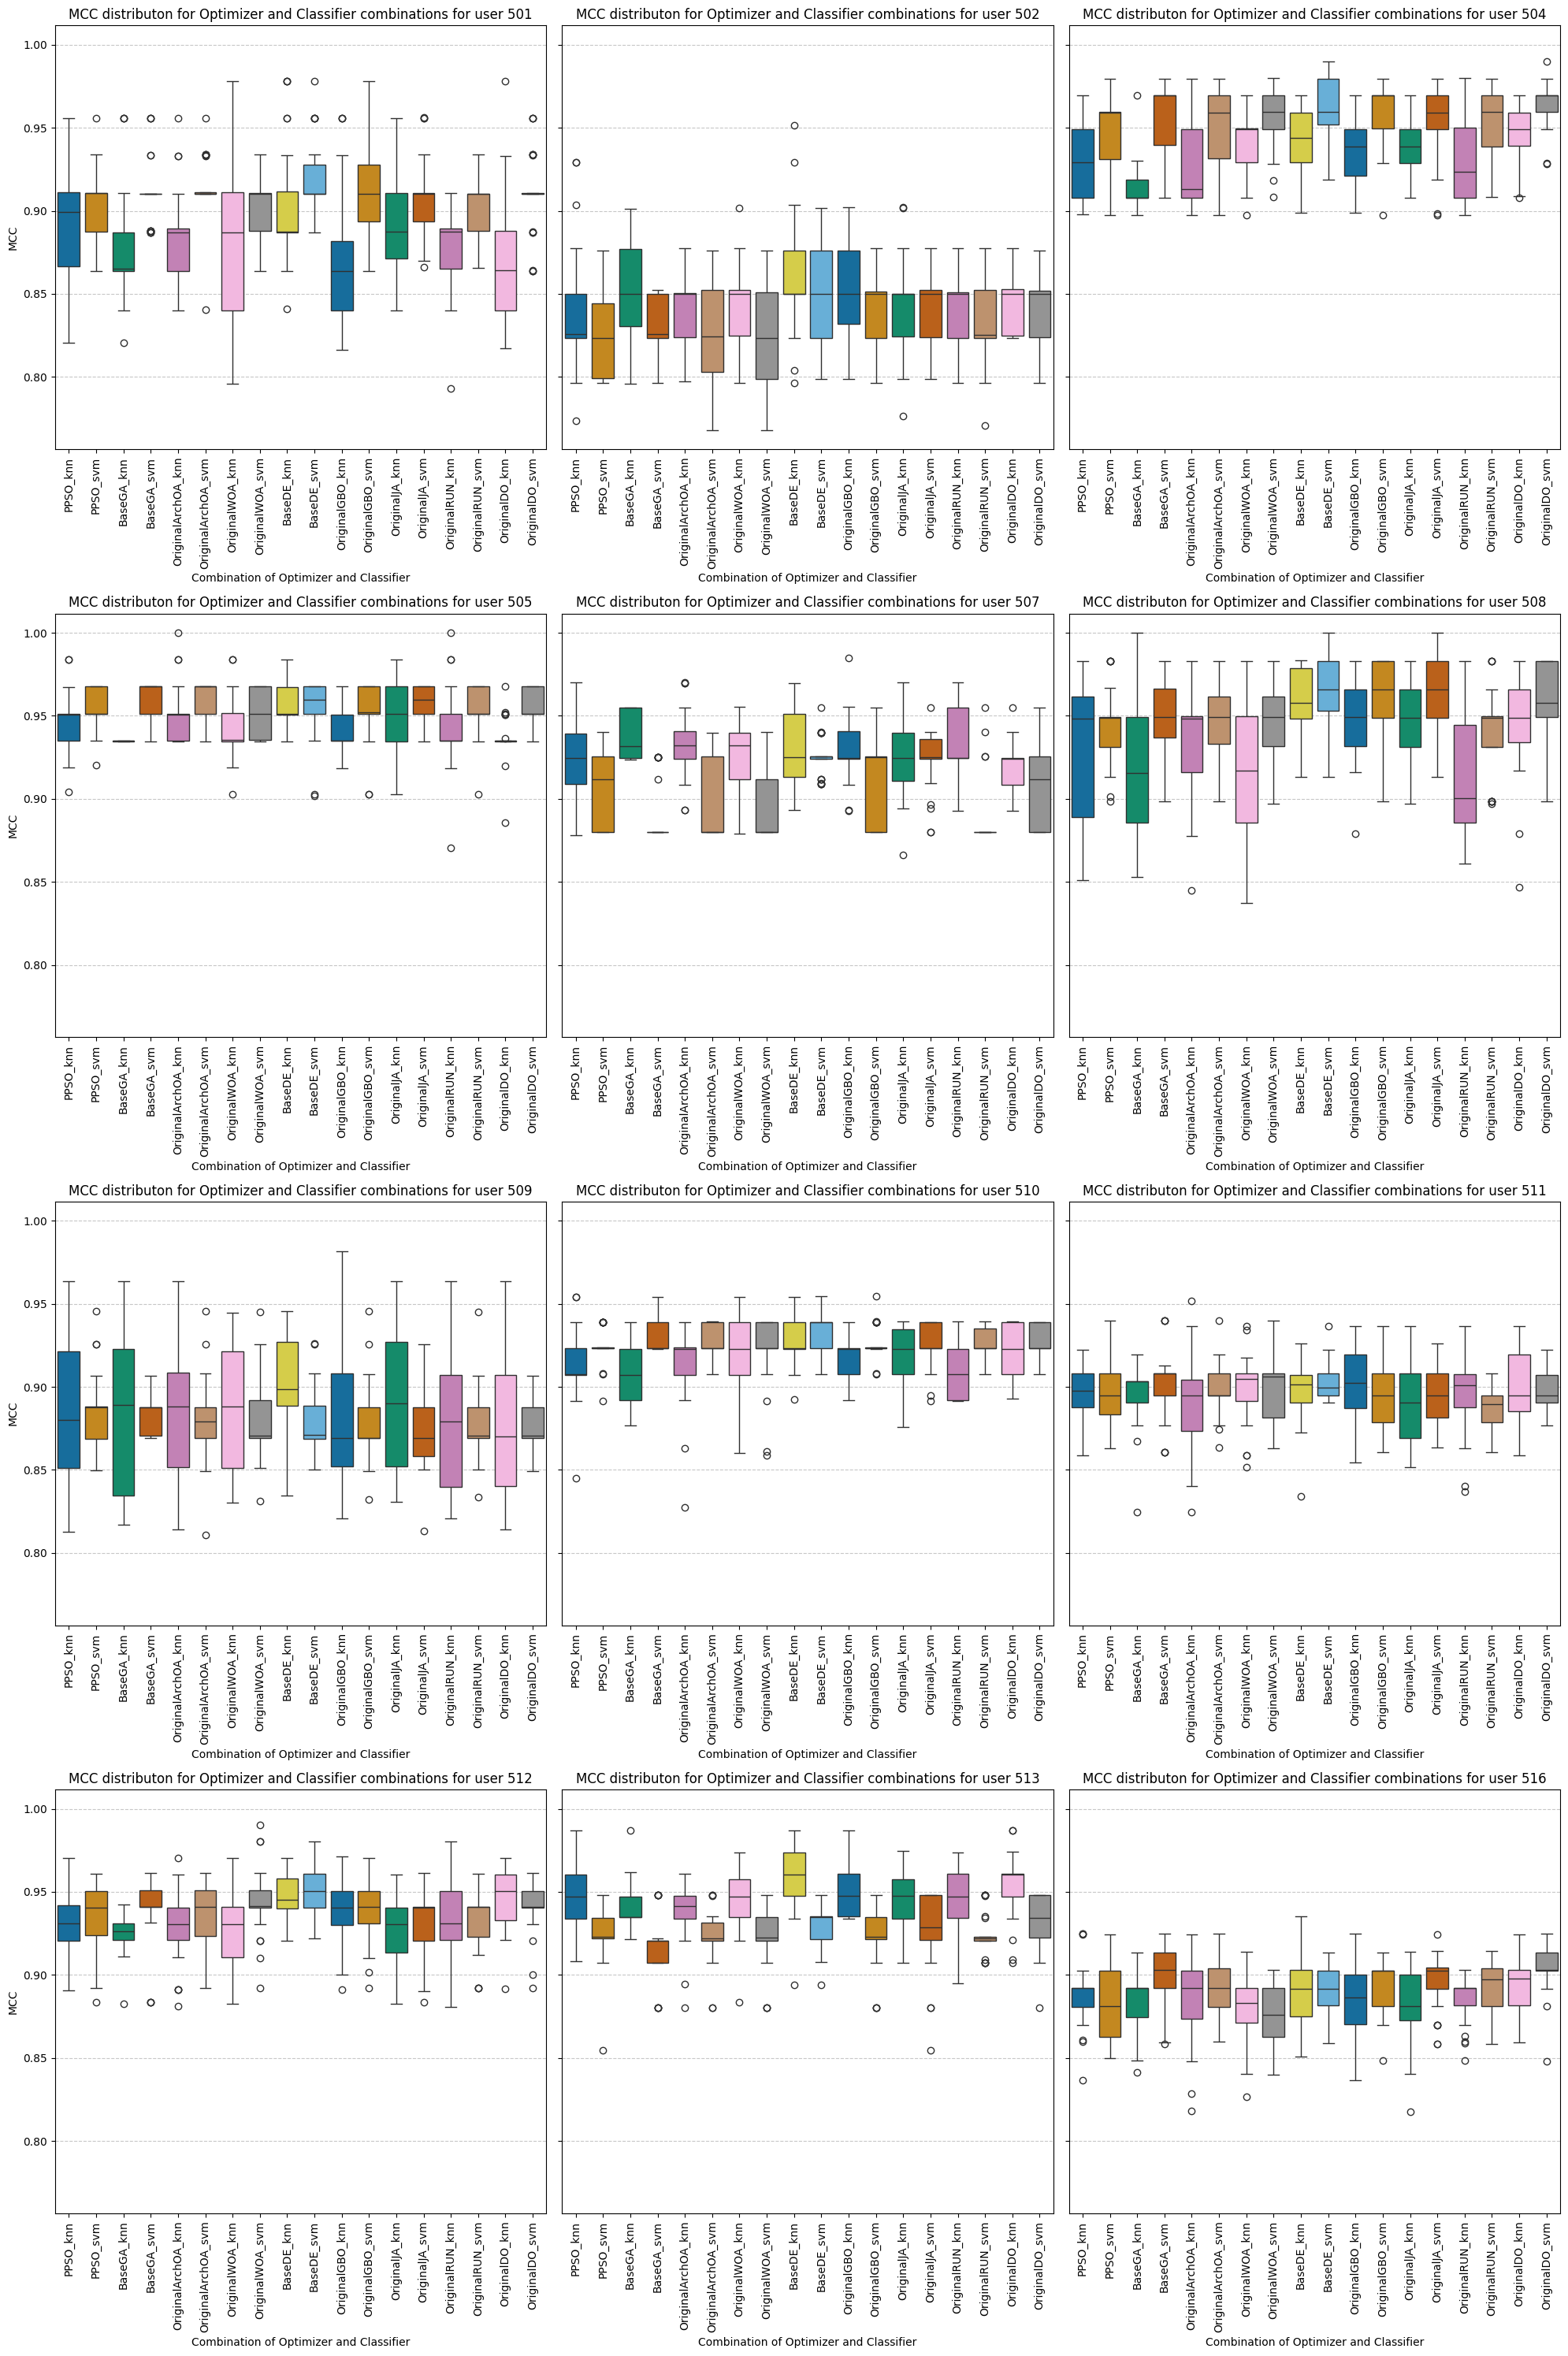

In [10]:
users = data["user"].unique()

fig, axes = plt.subplots(4,3, figsize=(20, 10*3), sharey = True)
axes = axes.flatten()

for ax, u in zip(axes, users):
    
    df_user = data[data["user"] == u]
    
    sns.boxplot(data=df_user, x = "combination", y = "MCC", palette= "colorblind", ax = ax)
    ax.set_title(f"MCC distributon for Optimizer and Classifier combinations for user {u}")
    ax.set_xlabel("Combination of Optimizer and Classifier")
    ax.set_ylabel("MCC")
    ax.tick_params(axis='x', rotation=90)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.savefig(r"C:\Users\Coord-Personal\Documents\ITZELT\data_sciece_girlypop\proyecto_salvador\imagenes\mcc_distribution_by_users1.svg")
plt.show()

## df with the average of the metrics 

In [11]:
data.head(3)

,user,iteration,optimizer,classifier,accuracy,precision,recall,F1,MCC,Balanced_accuracy,sensitivity,specificity,best_epoch,best_fitness,total_time,number_features,features,combination
0,501,1,PPSO,knn,0.955357,0.784238,0.778947,0.781431,0.887719,0.778947,0.778947,0.979894,27,0.884211,19.091141,6,"['meanX', 'corXY', 'corXZ', 'meanY2', 'sdY2', ...",PPSO_knn
1,501,1,PPSO,svm,0.964286,0.782577,0.789474,0.785965,0.910533,0.789474,0.789474,0.976421,7,0.867277,8.345630,3,"['meanY', 'auc', 'corXZ2']",PPSO_svm
2,502,1,PPSO,knn,0.923077,0.867500,0.830691,0.846617,0.773473,0.830691,0.830691,0.944545,11,0.871727,18.015047,3,"['maxX', 'minZ', 'sdX2']",PPSO_knn


In [12]:
df_average_metrics = data.groupby(["user", "combination"])[["accuracy", "precision",'recall',"F1", "MCC", "Balanced_accuracy", "sensitivity", "specificity", "number_features"]].mean().reset_index()

In [13]:
df_average_metrics

,user,combination,accuracy,precision,recall,F1,MCC,Balanced_accuracy,sensitivity,specificity,number_features
0,501,BaseDE_knn,0.961012,0.824798,0.803186,0.809536,0.901876,0.803186,0.803186,0.977755,10.733333
1,501,BaseDE_svm,0.967262,0.819749,0.804211,0.807242,0.917987,0.804211,0.804211,0.980468,11.066667
2,501,BaseGA_knn,0.950893,0.808083,0.785840,0.794468,0.875900,0.785840,0.785840,0.971733,3.833333
3,501,BaseGA_svm,0.964583,0.813159,0.799181,0.800234,0.911170,0.799181,0.799181,0.981139,4.366667
4,501,OriginalArchOA_knn,0.952679,0.803349,0.780861,0.789505,0.880389,0.780861,0.780861,0.974865,5.466667
...,...,...,...,...,...,...,...,...,...,...,...
211,516,OriginalRUN_svm,0.939468,0.883803,0.863529,0.869686,0.893469,0.863529,0.863529,0.977027,5.966667
212,516,OriginalWOA_knn,0.932311,0.874070,0.851620,0.859249,0.881408,0.851620,0.851620,0.975644,5.100000
213,516,OriginalWOA_svm,0.930675,0.859446,0.846236,0.849825,0.878032,0.846236,0.846236,0.974348,5.766667
214,516,PPSO_knn,0.936401,0.879479,0.858942,0.865842,0.888156,0.858942,0.858942,0.976540,5.000000


We have 9 optimizer * 2 classifiers = 18 combination, so after we got the average for each combination we should have a df of 216 rows given that 18 combinations * 12 users = 216 

In [14]:
df_average_metrics.to_csv(r"C:\Users\Coord-Personal\Documents\ITZELT\data_sciece_girlypop\proyecto_salvador\datos\average_metrics.csv", index = False)

How many features were selected on average with all the df?

In [ ]:
average_features = int(df_average_metrics["number_features"].mean())
print(f"The average number of features the optimizers choose were {average_features}")

The average number of features the optimizers chose was 5


How many features each user choose on average? 

In [16]:
for u in df_average_metrics["user"].unique():
    user_avg = df_average_metrics[df_average_metrics["user"] == u]["number_features"].mean()
    print(f"The average number of features the user {u} chose was {int(user_avg)}")

The average number of features the user 501 chose was 5
The average number of features the user 502 chose was 6
The average number of features the user 504 chose was 6
The average number of features the user 505 chose was 2
The average number of features the user 507 chose was 3
The average number of features the user 508 chose was 6
The average number of features the user 509 chose was 5
The average number of features the user 510 chose was 6
The average number of features the user 511 chose was 7
The average number of features the user 512 chose was 5
The average number of features the user 513 chose was 5
The average number of features the user 516 chose was 6


In general, the number of feature selected on the multiuser experiment were similar with the wrapper experiment (which average was 6)

## Feature Extraction 

In [17]:
data.head(2)

,user,iteration,optimizer,classifier,accuracy,precision,recall,F1,MCC,Balanced_accuracy,sensitivity,specificity,best_epoch,best_fitness,total_time,number_features,features,combination
0,501,1,PPSO,knn,0.955357,0.784238,0.778947,0.781431,0.887719,0.778947,0.778947,0.979894,27,0.884211,19.091141,6,"['meanX', 'corXY', 'corXZ', 'meanY2', 'sdY2', ...",PPSO_knn
1,501,1,PPSO,svm,0.964286,0.782577,0.789474,0.785965,0.910533,0.789474,0.789474,0.976421,7,0.867277,8.345630,3,"['meanY', 'auc', 'corXZ2']",PPSO_svm


we change the data type of feaures from str to list !

In [18]:
data["features"] = data["features"].astype(str).str.strip("[]").str.replace("'", "").str.split(", ")

In [19]:
print(type(data["features"].iloc[0]))

<class 'list'>


+ Here what we do is that we join the 30 lists of each user and combination into a single list

In [20]:
df_with_features = data.groupby(["user", "combination"]).agg({
    "features": lambda x: sum(x,[]) # the sum function joins the lists!!
})

In [21]:
df_with_features

features
user combination                                                          
501  BaseDE_knn          [maxZ, minX, corXZ, corYZ, auc, meanY2, meanZ2...
     BaseDE_svm          [meanZ, maxY, minX, minZ, corXY, sdMagnitude, ...
     BaseGA_knn          [meanZ2, maxY2, corXZ2, maxZ, maxY2, maxZ2, co...
     BaseGA_svm          [minX, meanDif, maxY2, corXZ2, minY, minZ, sdM...
     OriginalArchOA_knn  [maxY, corXZ, maxY2, maxZ2, corXZ2, maxX, corX...
...                                                                    ...
516  OriginalRUN_svm     [sdX, minX, sdX2, sdY2, minZ2, corXY2, sdX, mi...
     OriginalWOA_knn     [sdY2, maxX2, meanMagnitude2, sdX, sdZ, minX, ...
     OriginalWOA_svm     [sdY, corXZ, sdMagnitude, auc, sdZ2, minX2, sd...
     PPSO_knn            [minX, meanDif, sdY2, maxX2, maxX, sdMagnitude...
     PPSO_svm            [meanX, meanY, sdX, sdY, minY, corXY, sdX2, ma...

[216 rows x 1 columns]

we have 18 combinations and 12 users, so we should have a table of 216 = 18*12 which we have!!!

* now, we get the unique features to use it as a column in our new table 

In [22]:
unique_feature = set((df_with_features["features"].sum()))
len(unique_feature)

38

interesting... we had almost the same amount of unique featues as in the all data experiments (which had 37 unique features)

In [23]:
df_with_features

features
user combination                                                          
501  BaseDE_knn          [maxZ, minX, corXZ, corYZ, auc, meanY2, meanZ2...
     BaseDE_svm          [meanZ, maxY, minX, minZ, corXY, sdMagnitude, ...
     BaseGA_knn          [meanZ2, maxY2, corXZ2, maxZ, maxY2, maxZ2, co...
     BaseGA_svm          [minX, meanDif, maxY2, corXZ2, minY, minZ, sdM...
     OriginalArchOA_knn  [maxY, corXZ, maxY2, maxZ2, corXZ2, maxX, corX...
...                                                                    ...
516  OriginalRUN_svm     [sdX, minX, sdX2, sdY2, minZ2, corXY2, sdX, mi...
     OriginalWOA_knn     [sdY2, maxX2, meanMagnitude2, sdX, sdZ, minX, ...
     OriginalWOA_svm     [sdY, corXZ, sdMagnitude, auc, sdZ2, minX2, sd...
     PPSO_knn            [minX, meanDif, sdY2, maxX2, maxX, sdMagnitude...
     PPSO_svm            [meanX, meanY, sdX, sdY, minY, corXY, sdX2, ma...

[216 rows x 1 columns]

we have to turn it back the user as a column to avoid error in the counter chunck 

In [24]:
df_with_features = df_with_features.reset_index()

In [25]:
df_with_features

,user,combination,features
0,501,BaseDE_knn,"[maxZ, minX, corXZ, corYZ, auc, meanY2, meanZ2..."
1,501,BaseDE_svm,"[meanZ, maxY, minX, minZ, corXY, sdMagnitude, ..."
2,501,BaseGA_knn,"[meanZ2, maxY2, corXZ2, maxZ, maxY2, maxZ2, co..."
3,501,BaseGA_svm,"[minX, meanDif, maxY2, corXZ2, minY, minZ, sdM..."
4,501,OriginalArchOA_knn,"[maxY, corXZ, maxY2, maxZ2, corXZ2, maxX, corX..."
...,...,...,...
211,516,OriginalRUN_svm,"[sdX, minX, sdX2, sdY2, minZ2, corXY2, sdX, mi..."
212,516,OriginalWOA_knn,"[sdY2, maxX2, meanMagnitude2, sdX, sdZ, minX, ..."
213,516,OriginalWOA_svm,"[sdY, corXZ, sdMagnitude, auc, sdZ2, minX2, sd..."
214,516,PPSO_knn,"[minX, meanDif, sdY2, maxX2, maxX, sdMagnitude..."


* We create a null df with the combinations and the feature columns

In [26]:
feature_counts = pd.DataFrame(columns = ["combination"] + list(unique_feature))

In [27]:
feature_counts

,combination,meanY,corXY,corXY2,meanMagnitude2,maxY2,corXZ2,maxZ2,sdZ,meanY2,...,meanZ2,sdX2,sdMagnitude,corYZ,maxX,auc,sdY,minY,minX,meanDif2


In [28]:
from collections import Counter

for i, row in df_with_features.iterrows():
    count = Counter(row["features"])  # Contar ocurrencias de cada feature
    data_row = {feature: count.get(feature, 0) for feature in unique_feature}  # Obtener los conteos
    data_row.update({
        "combination": row["combination"],
        "user": row["user"]
        })
    feature_counts = pd.concat([feature_counts, pd.DataFrame([data_row])], ignore_index=True)

* We have to make sure that the indexes are the combinations to be able to make our heatmap, otherwise it can´t be done

In [29]:
feature_counts.set_index("combination", inplace = True)

In [30]:
feature_counts

,meanY,corXY,corXY2,meanMagnitude2,maxY2,corXZ2,maxZ2,sdZ,meanY2,meanMagnitude,...,sdX2,sdMagnitude,corYZ,maxX,auc,sdY,minY,minX,meanDif2,user
combination,,,,,,,,,,,,,,,,,,,,,
BaseDE_knn,1,19,5,8,23,30,7,6,9,8,...,2,5,5,3,10,10,4,11,12,501.0
BaseDE_svm,16,11,2,7,19,30,6,7,19,13,...,0,8,7,6,8,6,9,11,5,501.0
BaseGA_knn,0,1,0,1,27,27,8,0,3,3,...,0,0,0,0,2,3,0,2,0,501.0
BaseGA_svm,2,0,0,1,30,30,0,0,8,1,...,1,7,0,6,2,5,3,6,0,501.0
OriginalArchOA_knn,1,21,1,1,19,27,4,1,6,5,...,0,0,0,5,4,2,0,6,1,501.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OriginalRUN_svm,1,0,8,6,4,1,1,5,6,1,...,9,12,1,3,1,10,1,10,0,516.0
OriginalWOA_knn,1,0,1,2,3,0,7,7,3,3,...,15,6,0,4,7,6,0,2,0,516.0
OriginalWOA_svm,1,0,7,5,3,0,3,6,3,1,...,6,11,1,6,5,10,10,6,0,516.0


just checking out some things 

In [31]:
feature_counts["user"].value_counts()

user
501.0    18
502.0    18
504.0    18
505.0    18
507.0    18
508.0    18
509.0    18
510.0    18
511.0    18
512.0    18
513.0    18
516.0    18
Name: count, dtype: int64

In [32]:
feature_counts.to_csv(r"C:\Users\Coord-Personal\Documents\ITZELT\data_sciece_girlypop\proyecto_salvador\datos\df_matrix_features_counts.csv", index = True)

we need to do the following:

* convert the value to float 
* order the number of features from highest to lowest so that we can see which ones were chosen the most 


feature matrix and the features graphs by user 

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_1080\2404769947.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_sums.values, y=feature_sums.index, orient="h", palette="colorblind", ax=axes[1])


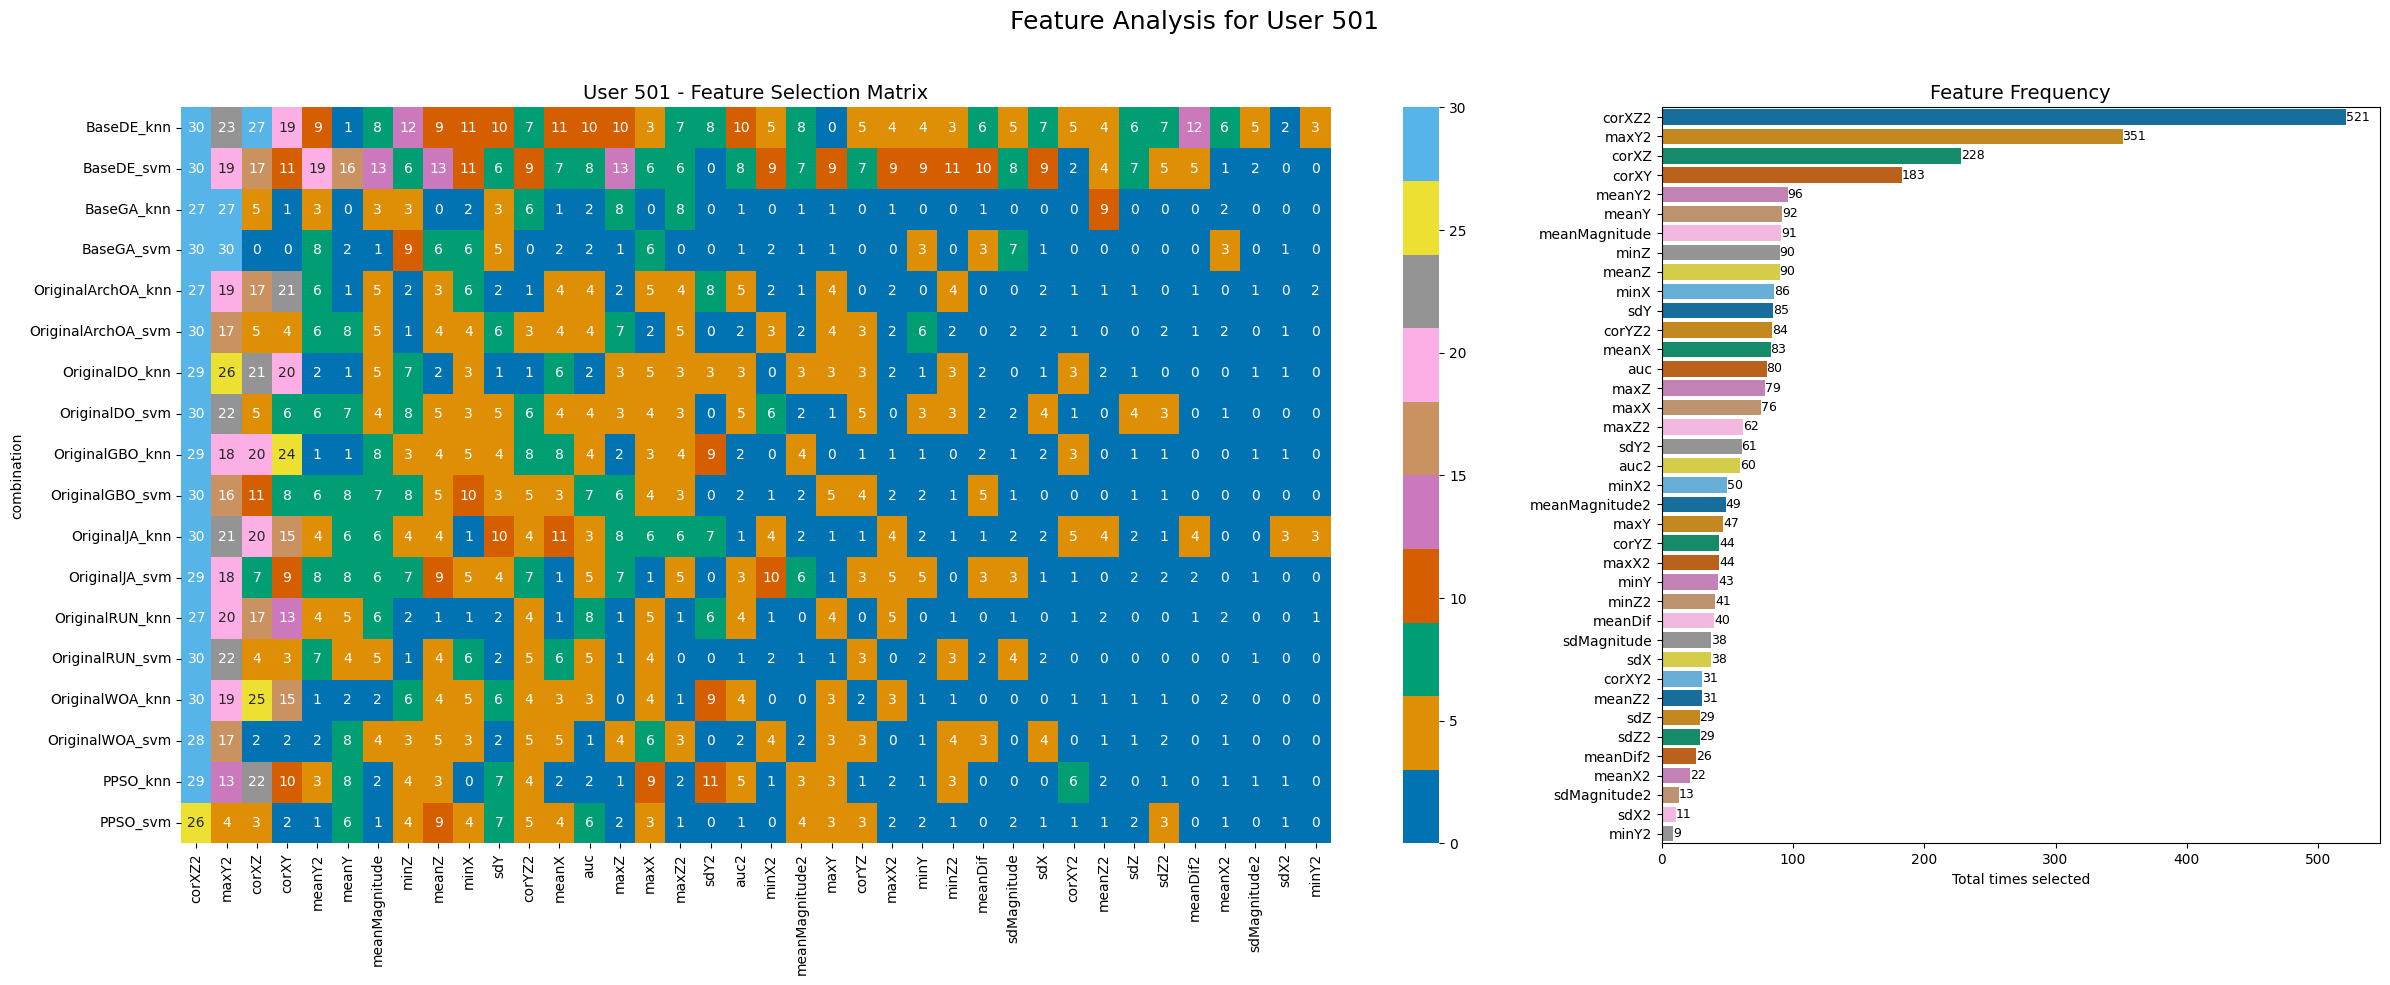

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_1080\2404769947.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_sums.values, y=feature_sums.index, orient="h", palette="colorblind", ax=axes[1])


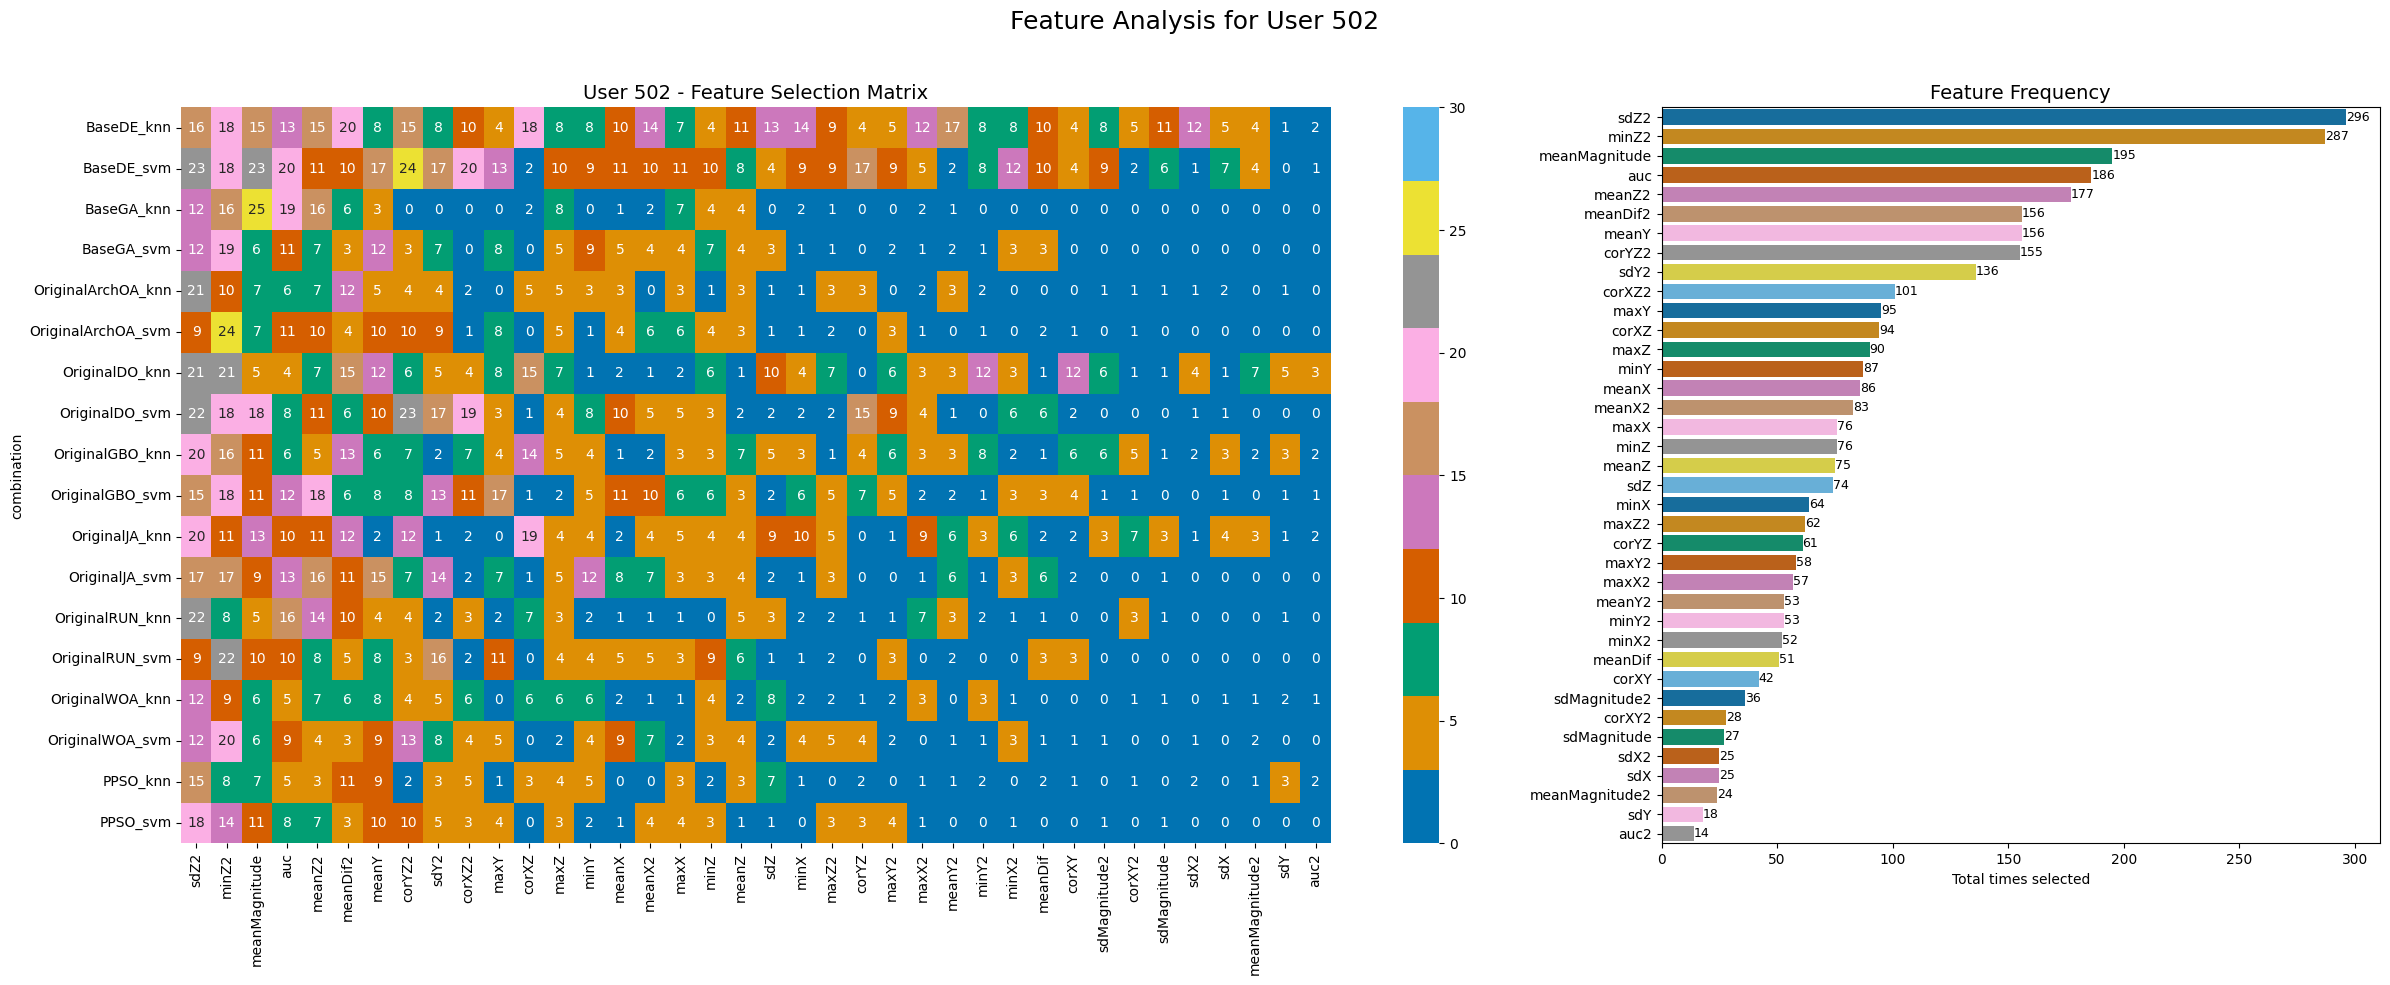

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_1080\2404769947.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_sums.values, y=feature_sums.index, orient="h", palette="colorblind", ax=axes[1])


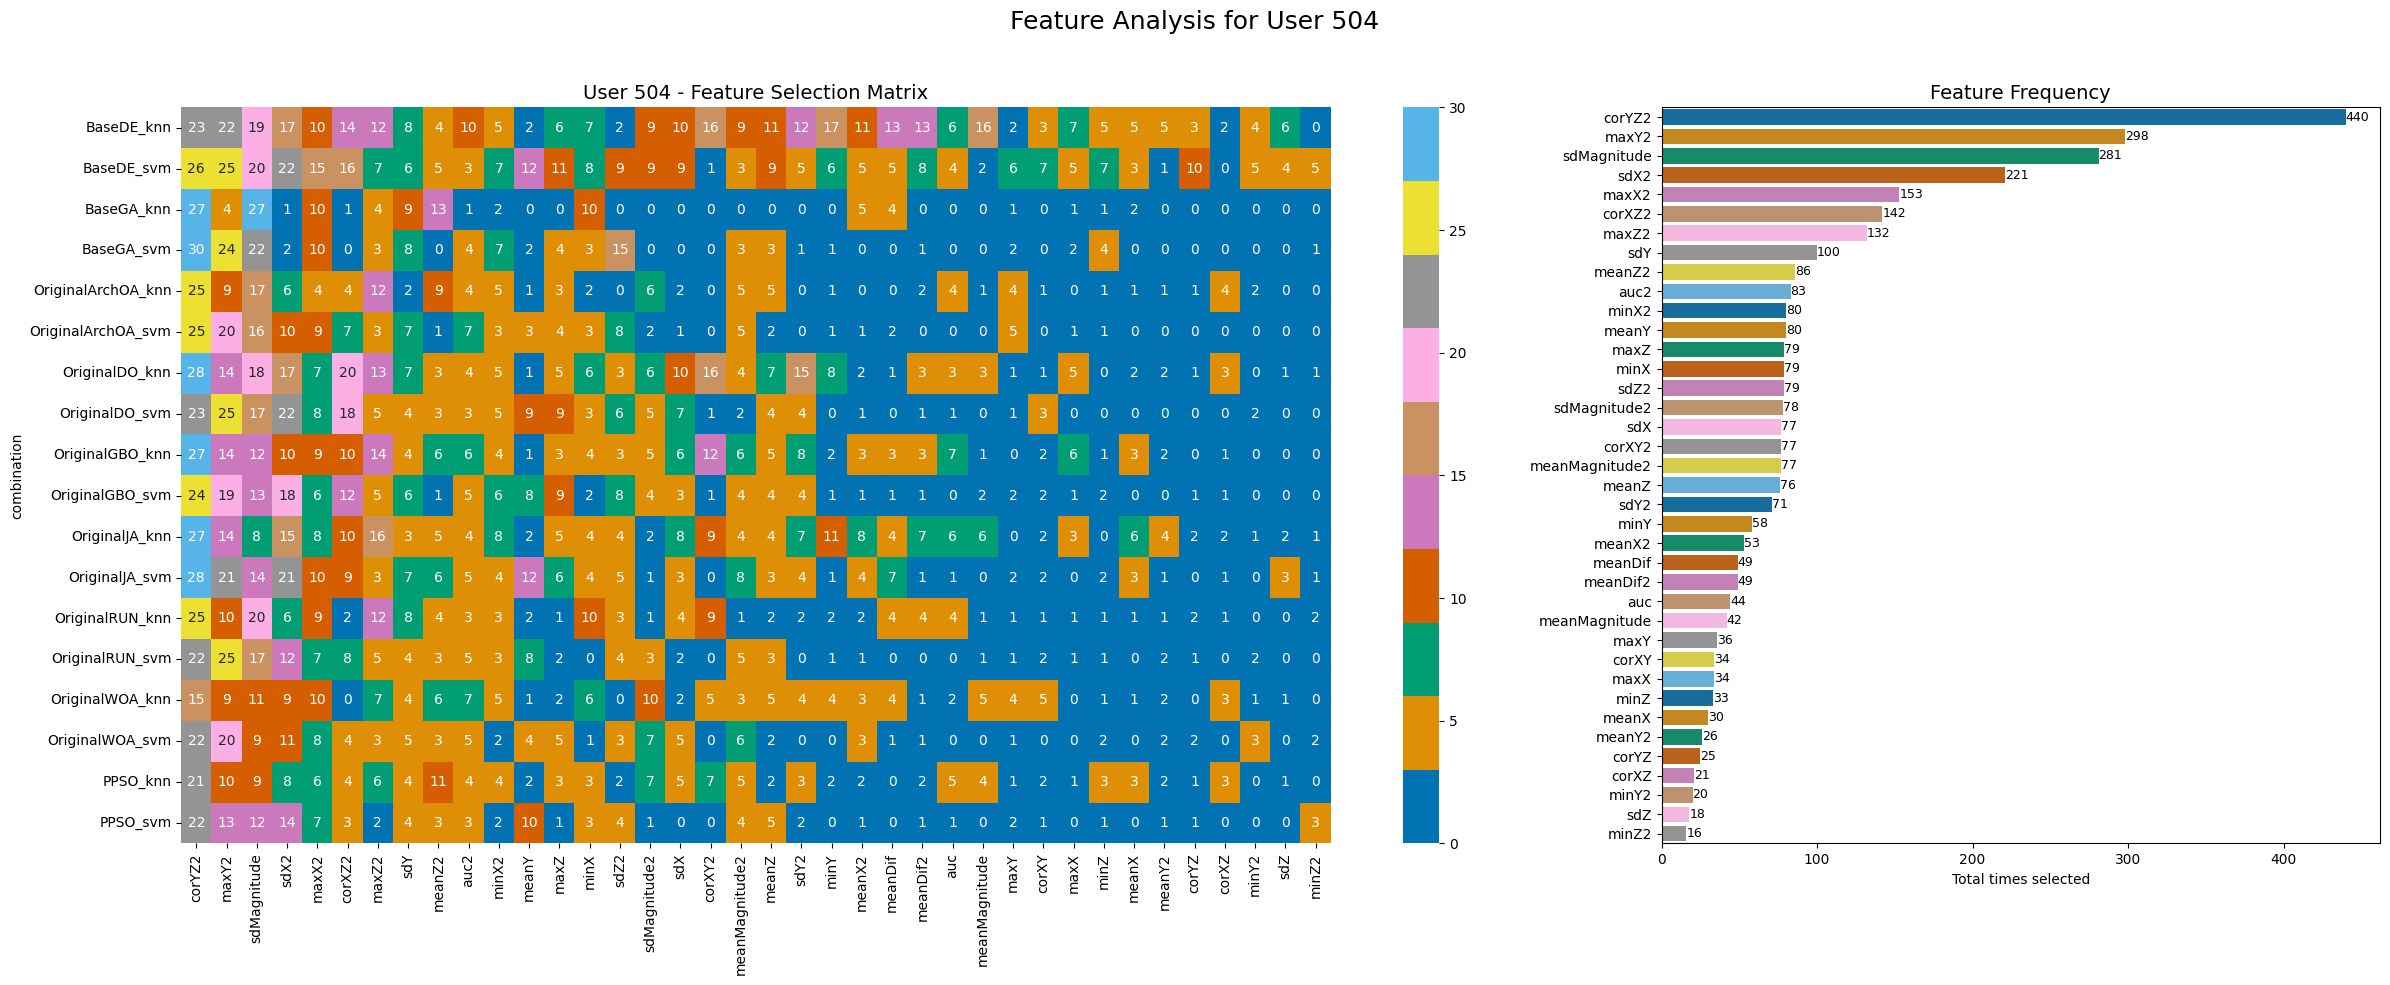

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_1080\2404769947.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_sums.values, y=feature_sums.index, orient="h", palette="colorblind", ax=axes[1])


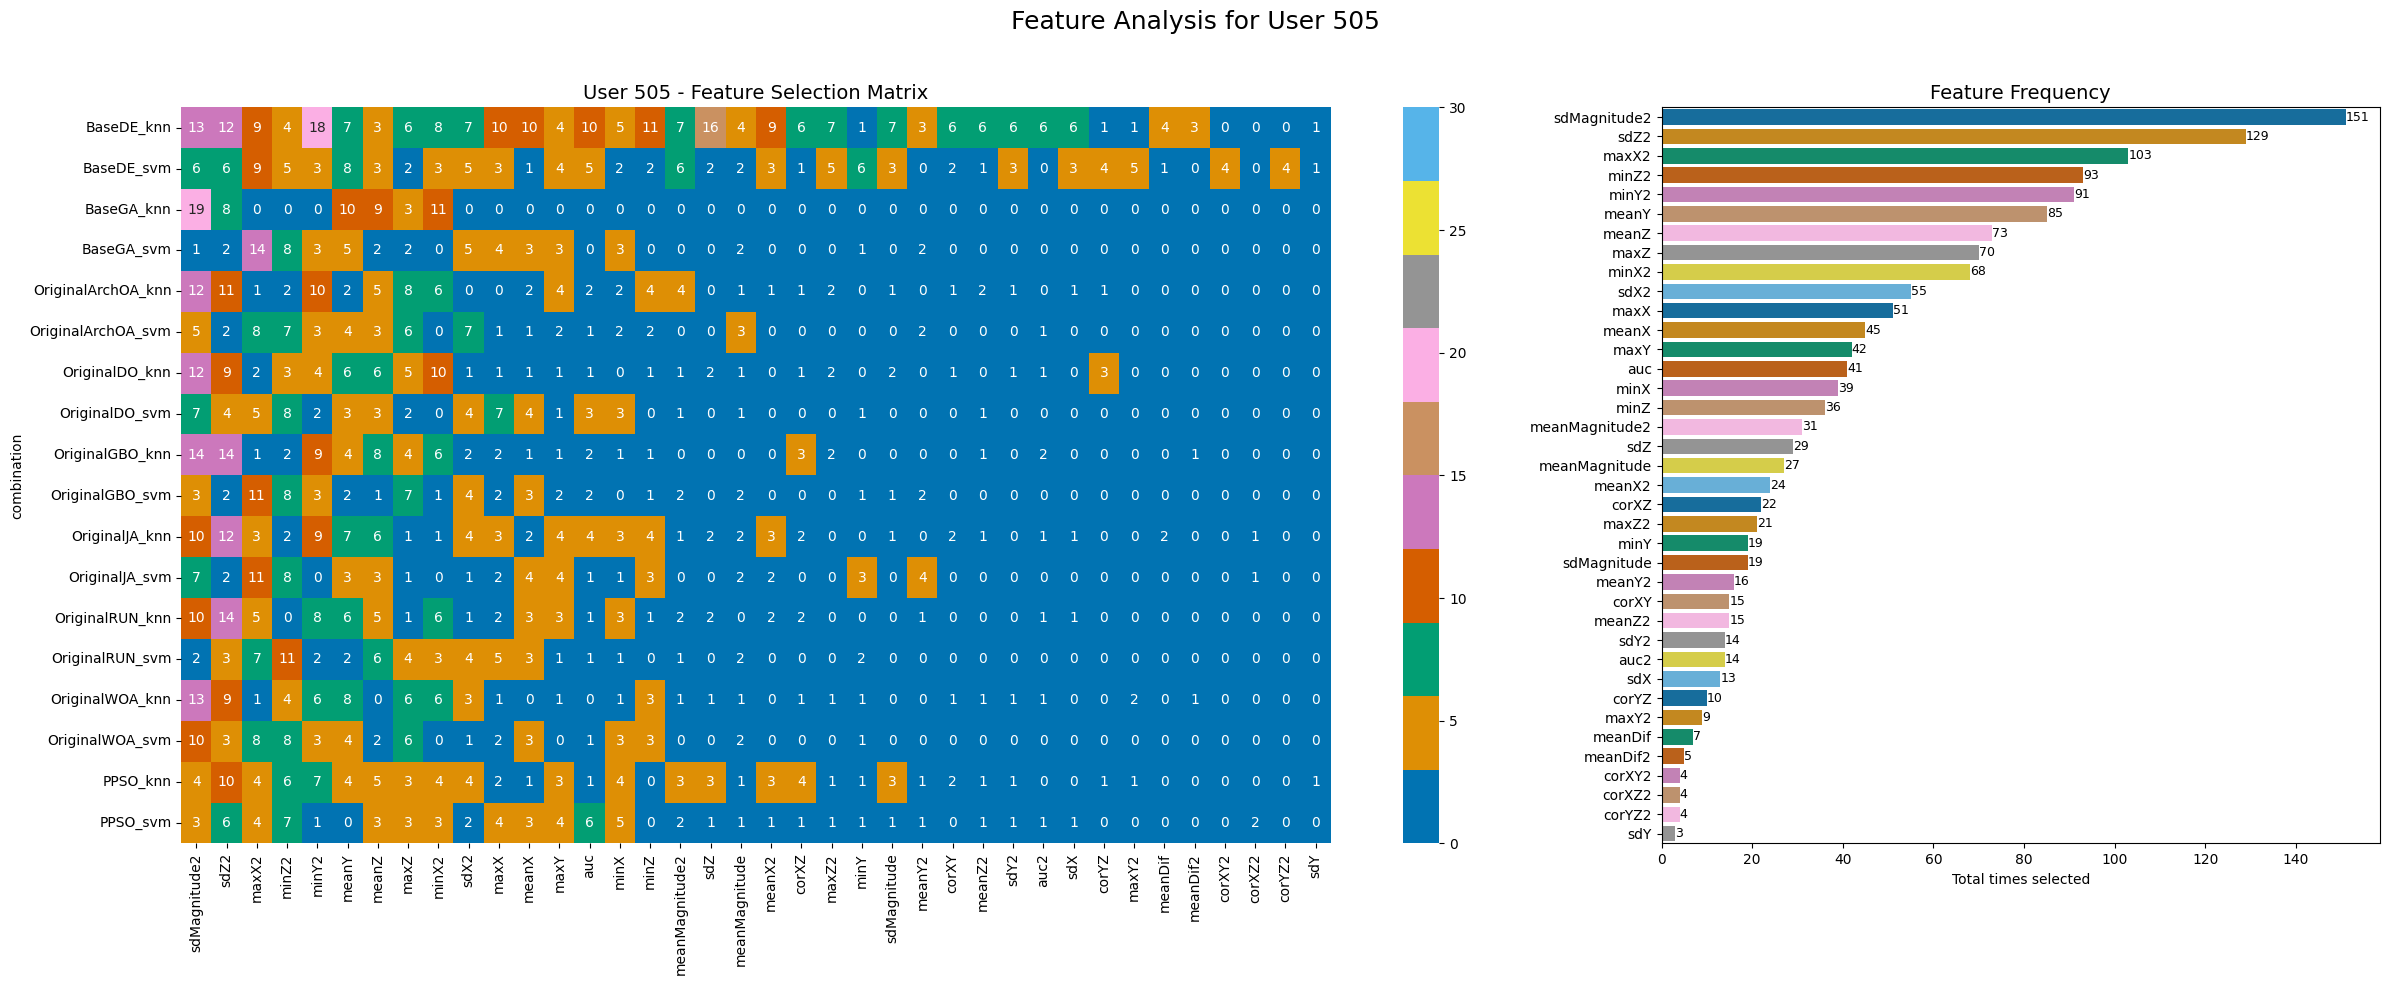

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_1080\2404769947.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_sums.values, y=feature_sums.index, orient="h", palette="colorblind", ax=axes[1])


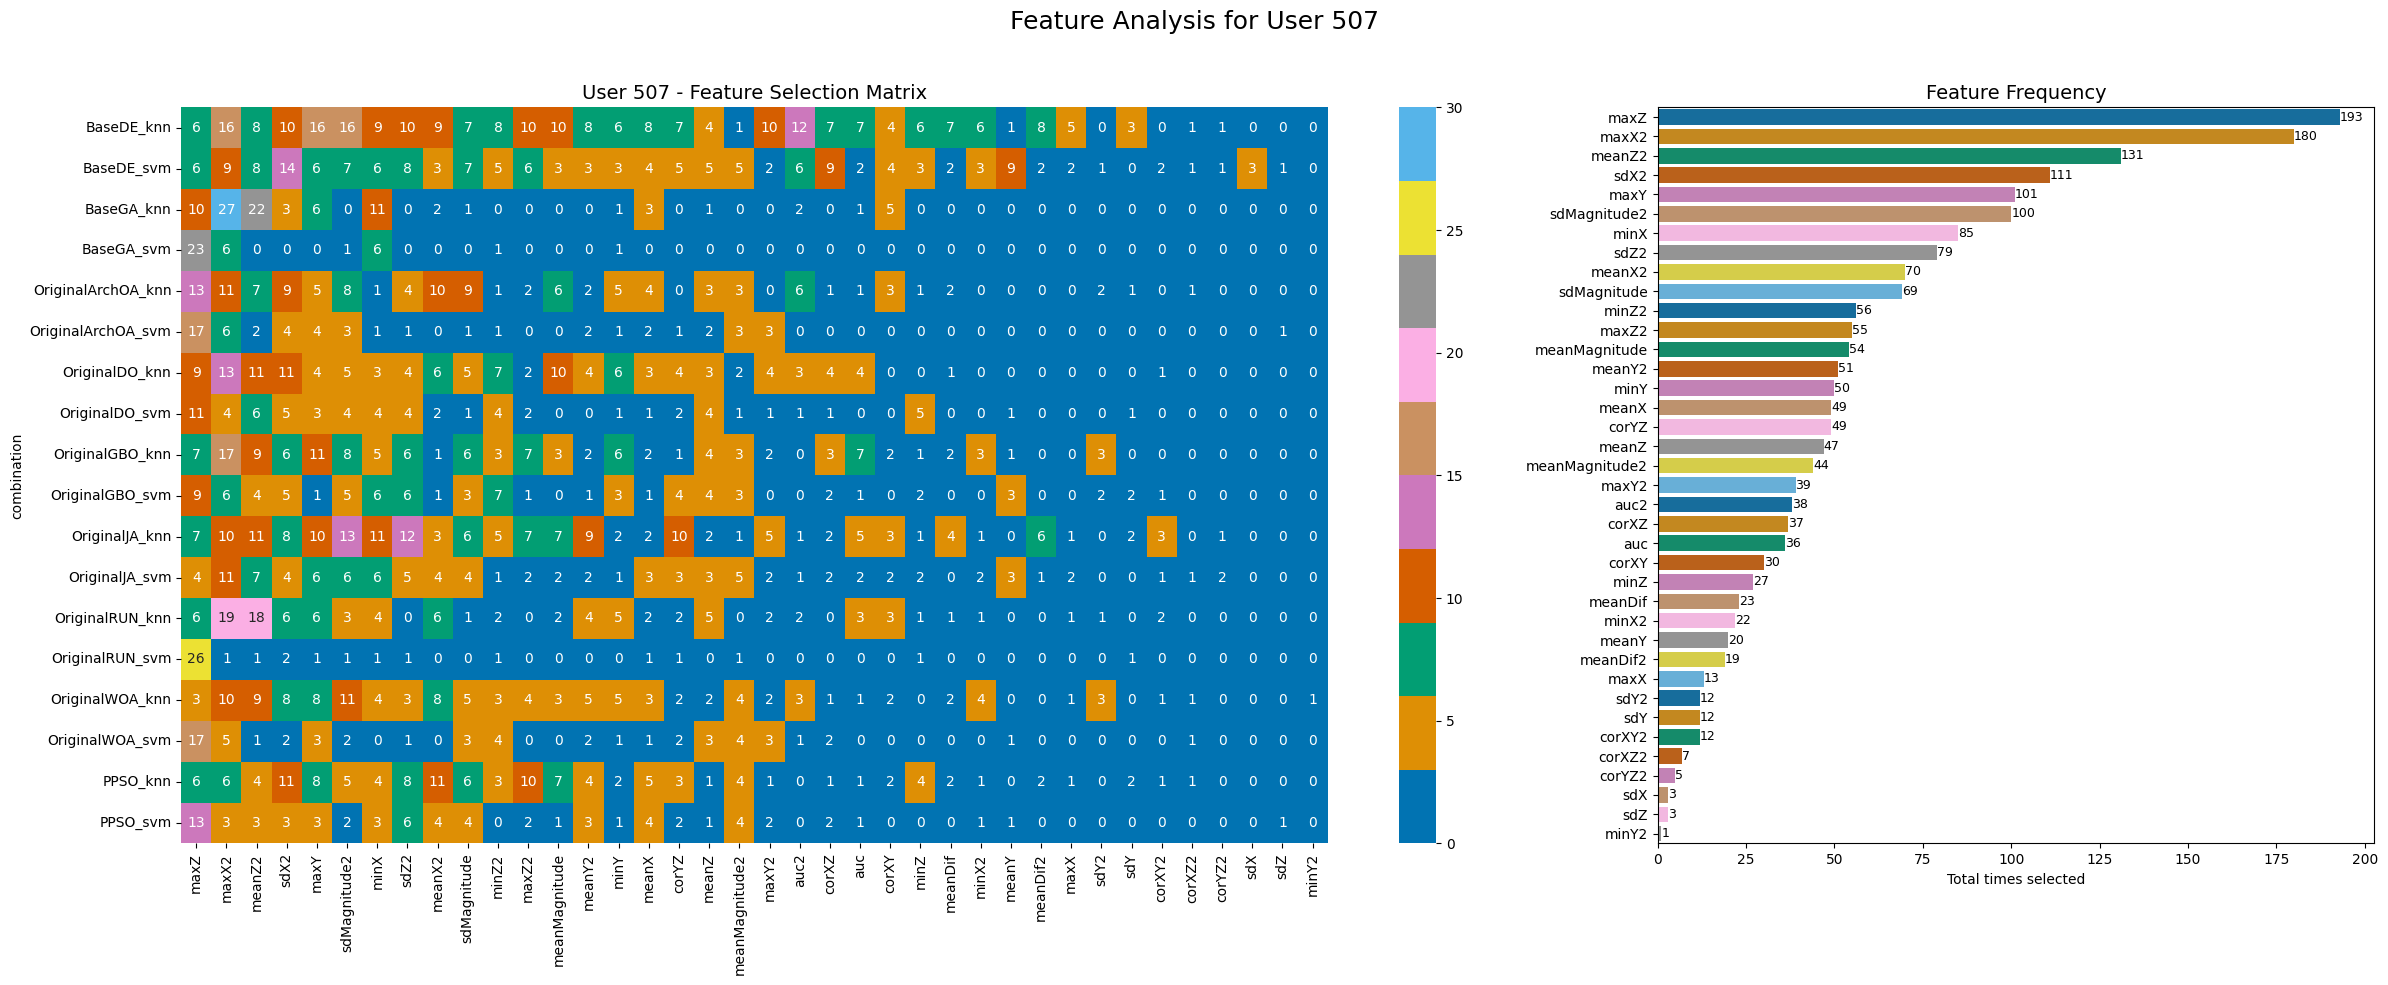

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_1080\2404769947.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_sums.values, y=feature_sums.index, orient="h", palette="colorblind", ax=axes[1])


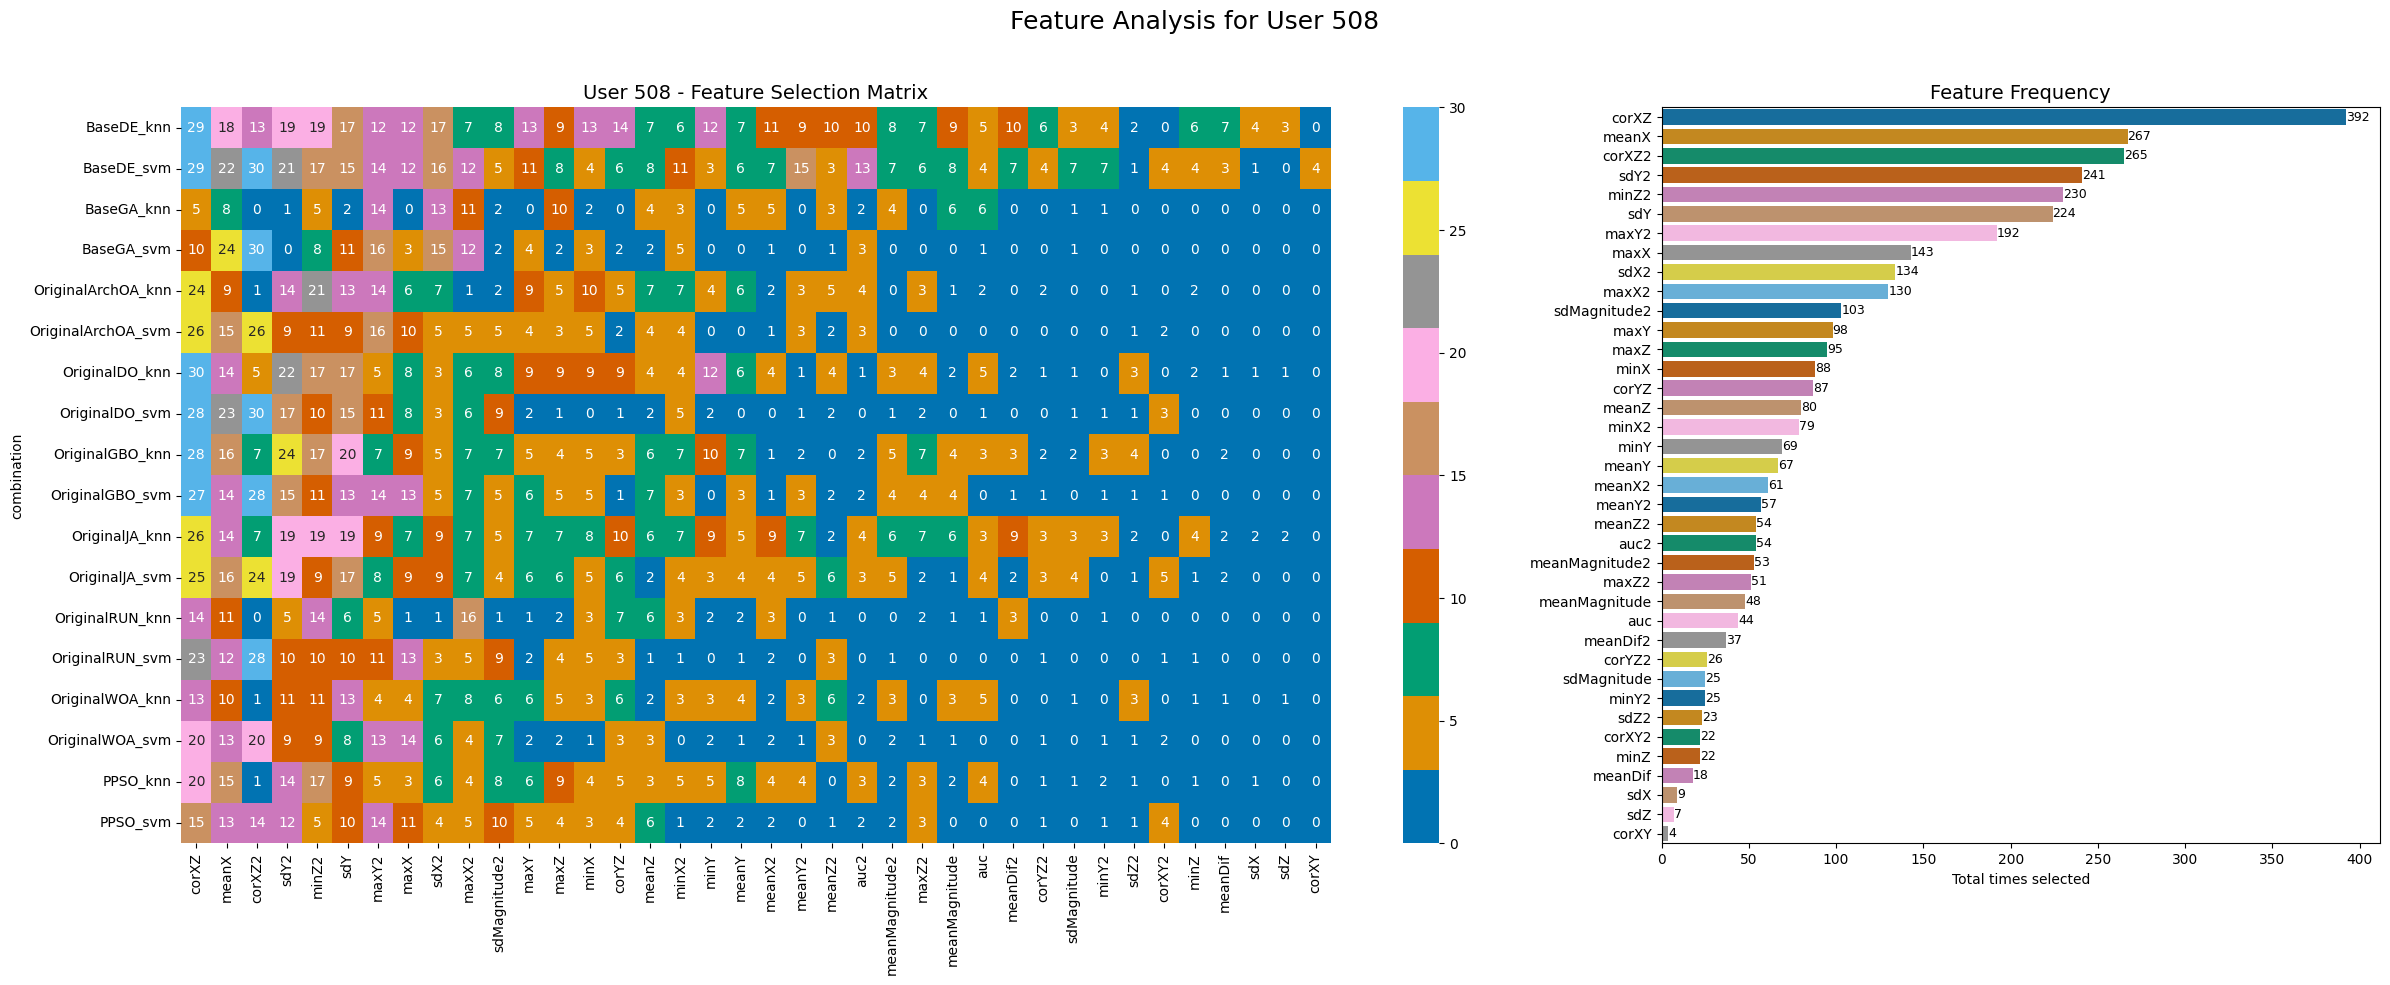

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_1080\2404769947.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_sums.values, y=feature_sums.index, orient="h", palette="colorblind", ax=axes[1])


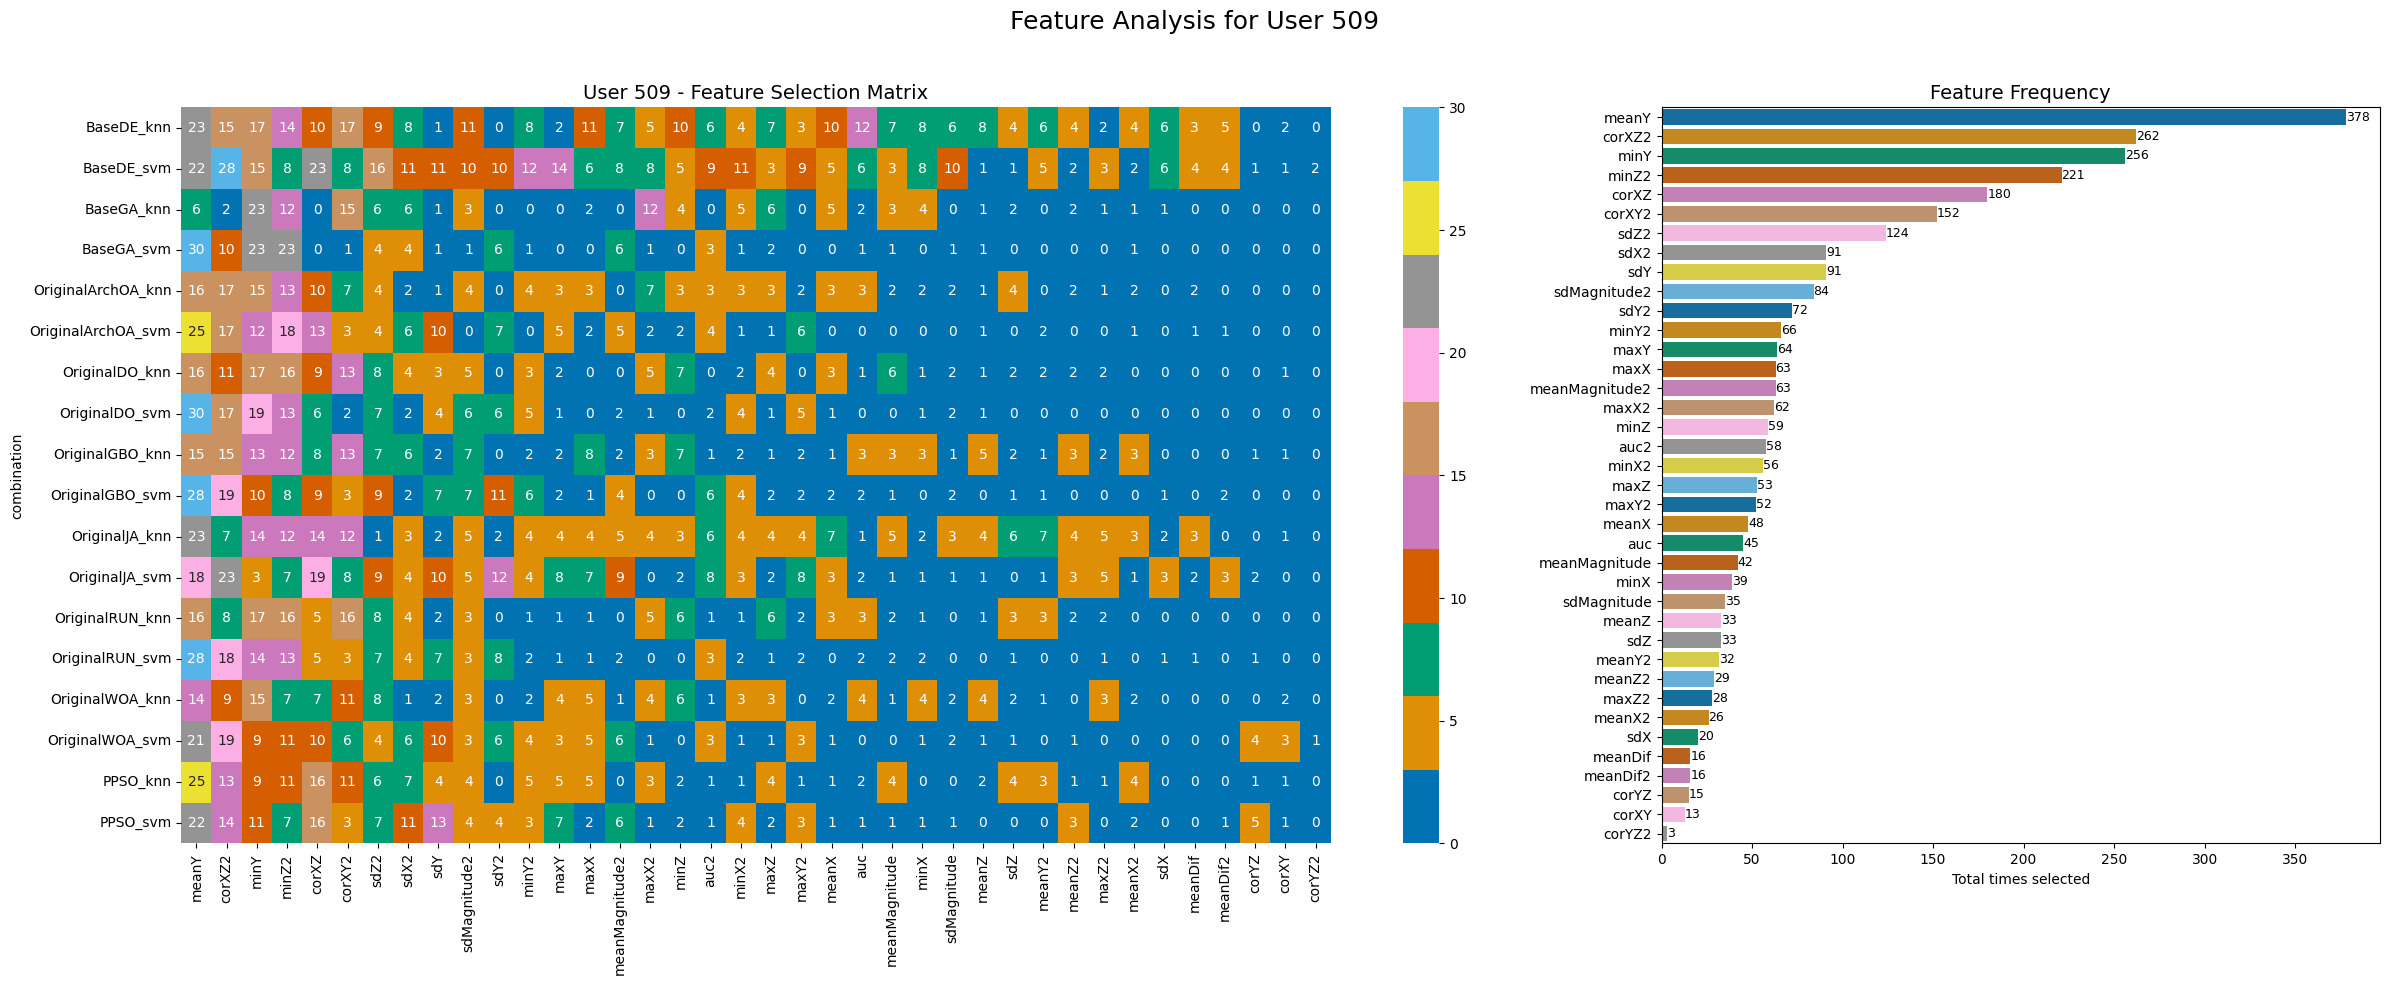

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_1080\2404769947.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_sums.values, y=feature_sums.index, orient="h", palette="colorblind", ax=axes[1])


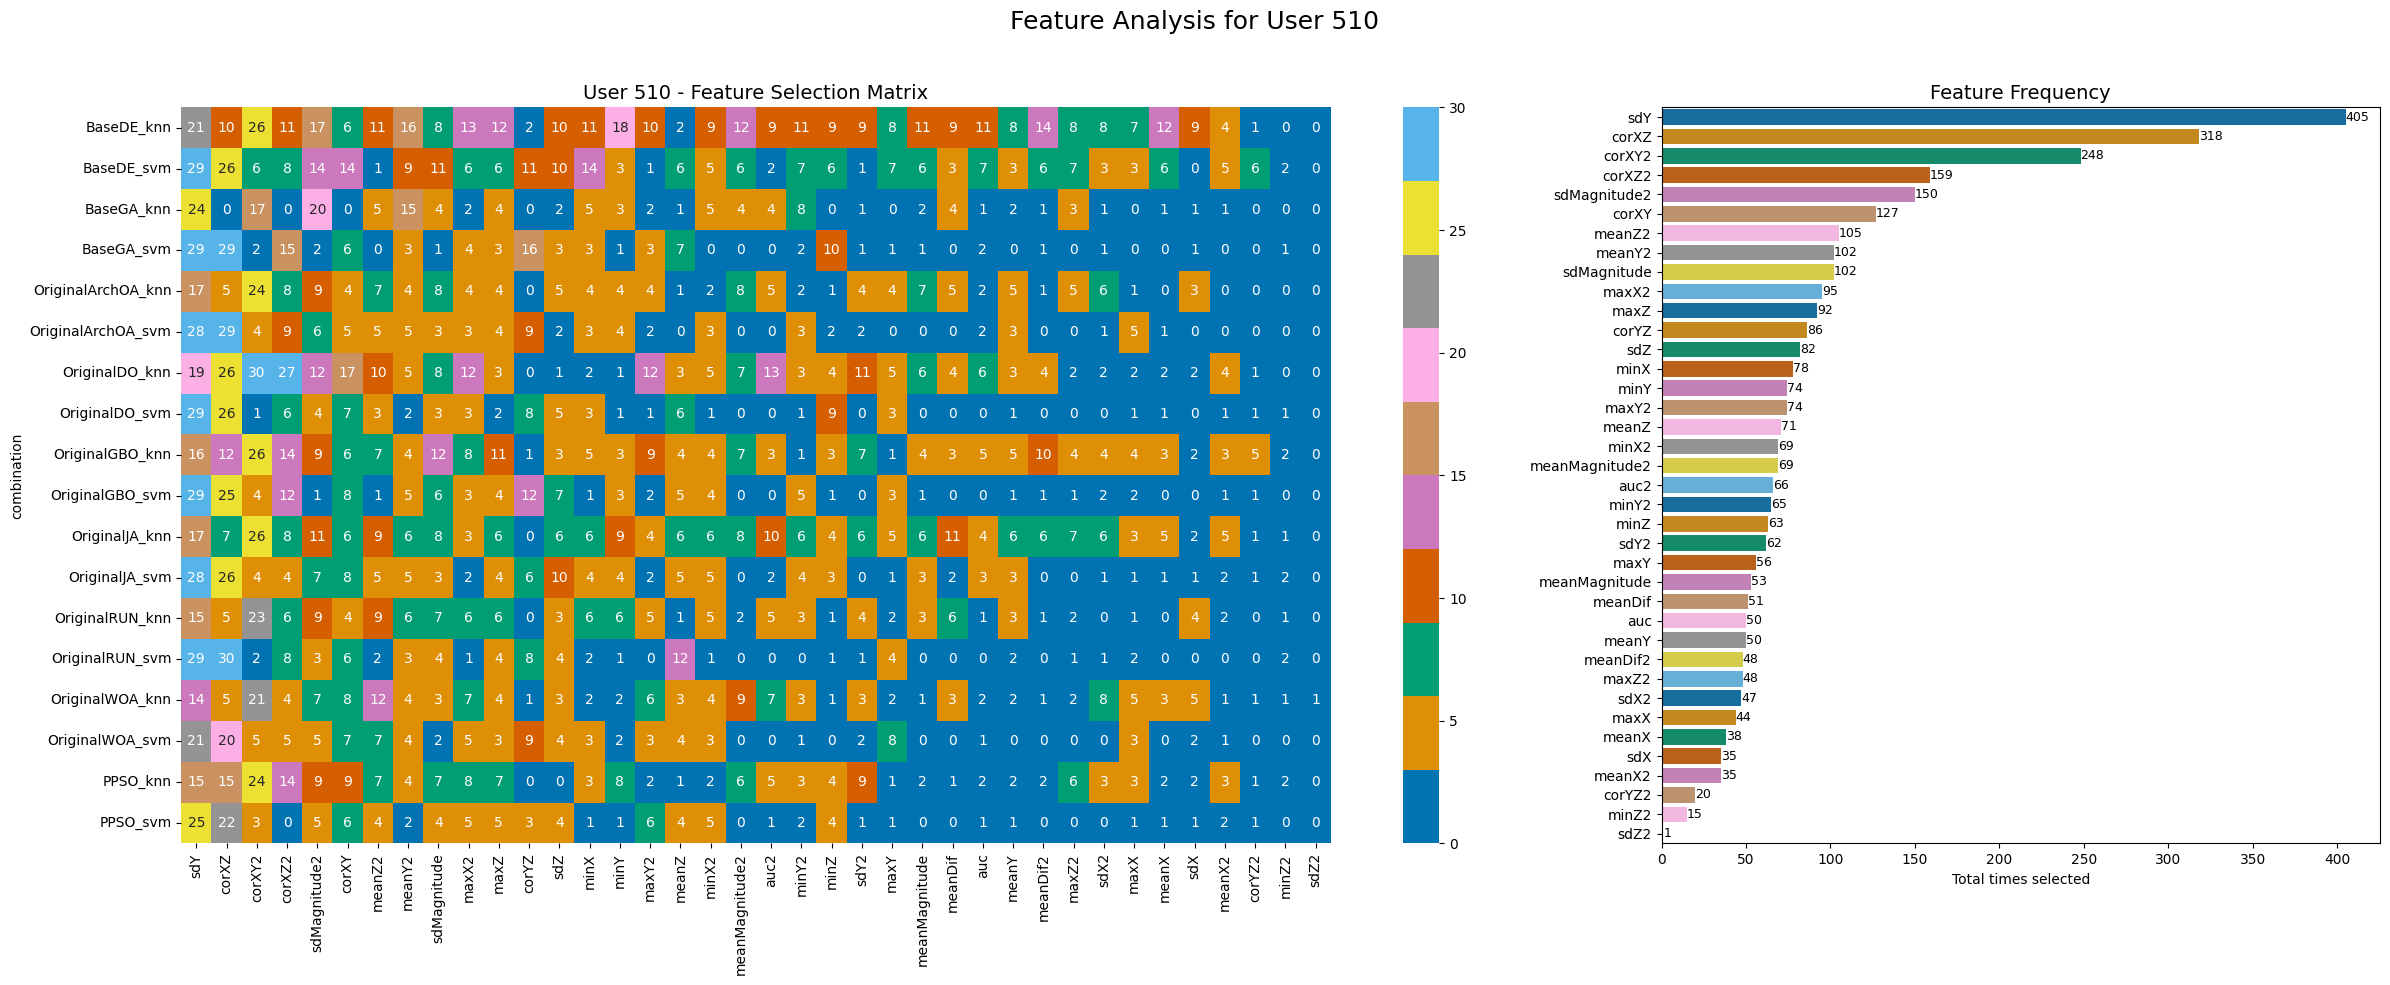

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_1080\2404769947.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_sums.values, y=feature_sums.index, orient="h", palette="colorblind", ax=axes[1])


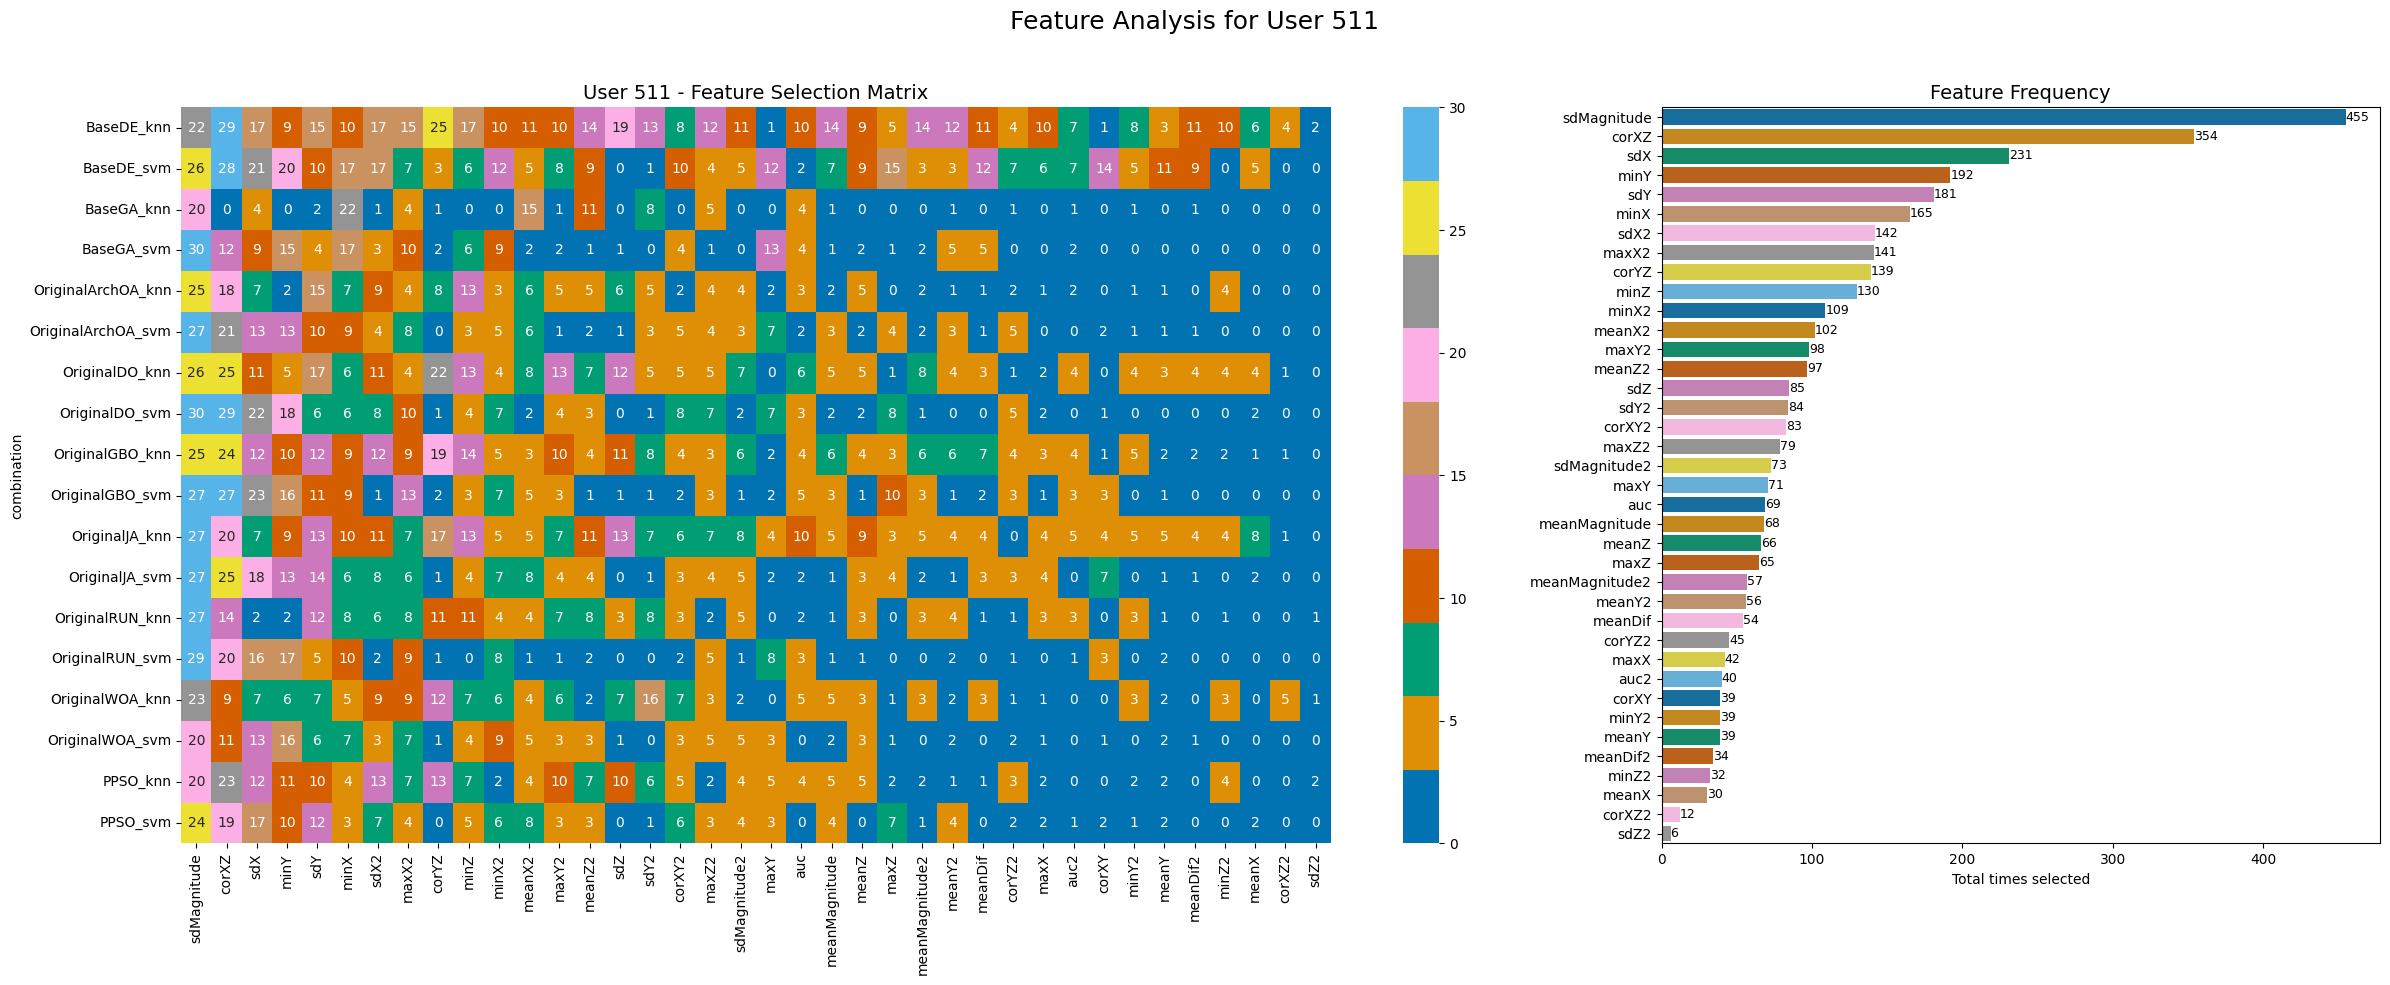

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_1080\2404769947.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_sums.values, y=feature_sums.index, orient="h", palette="colorblind", ax=axes[1])


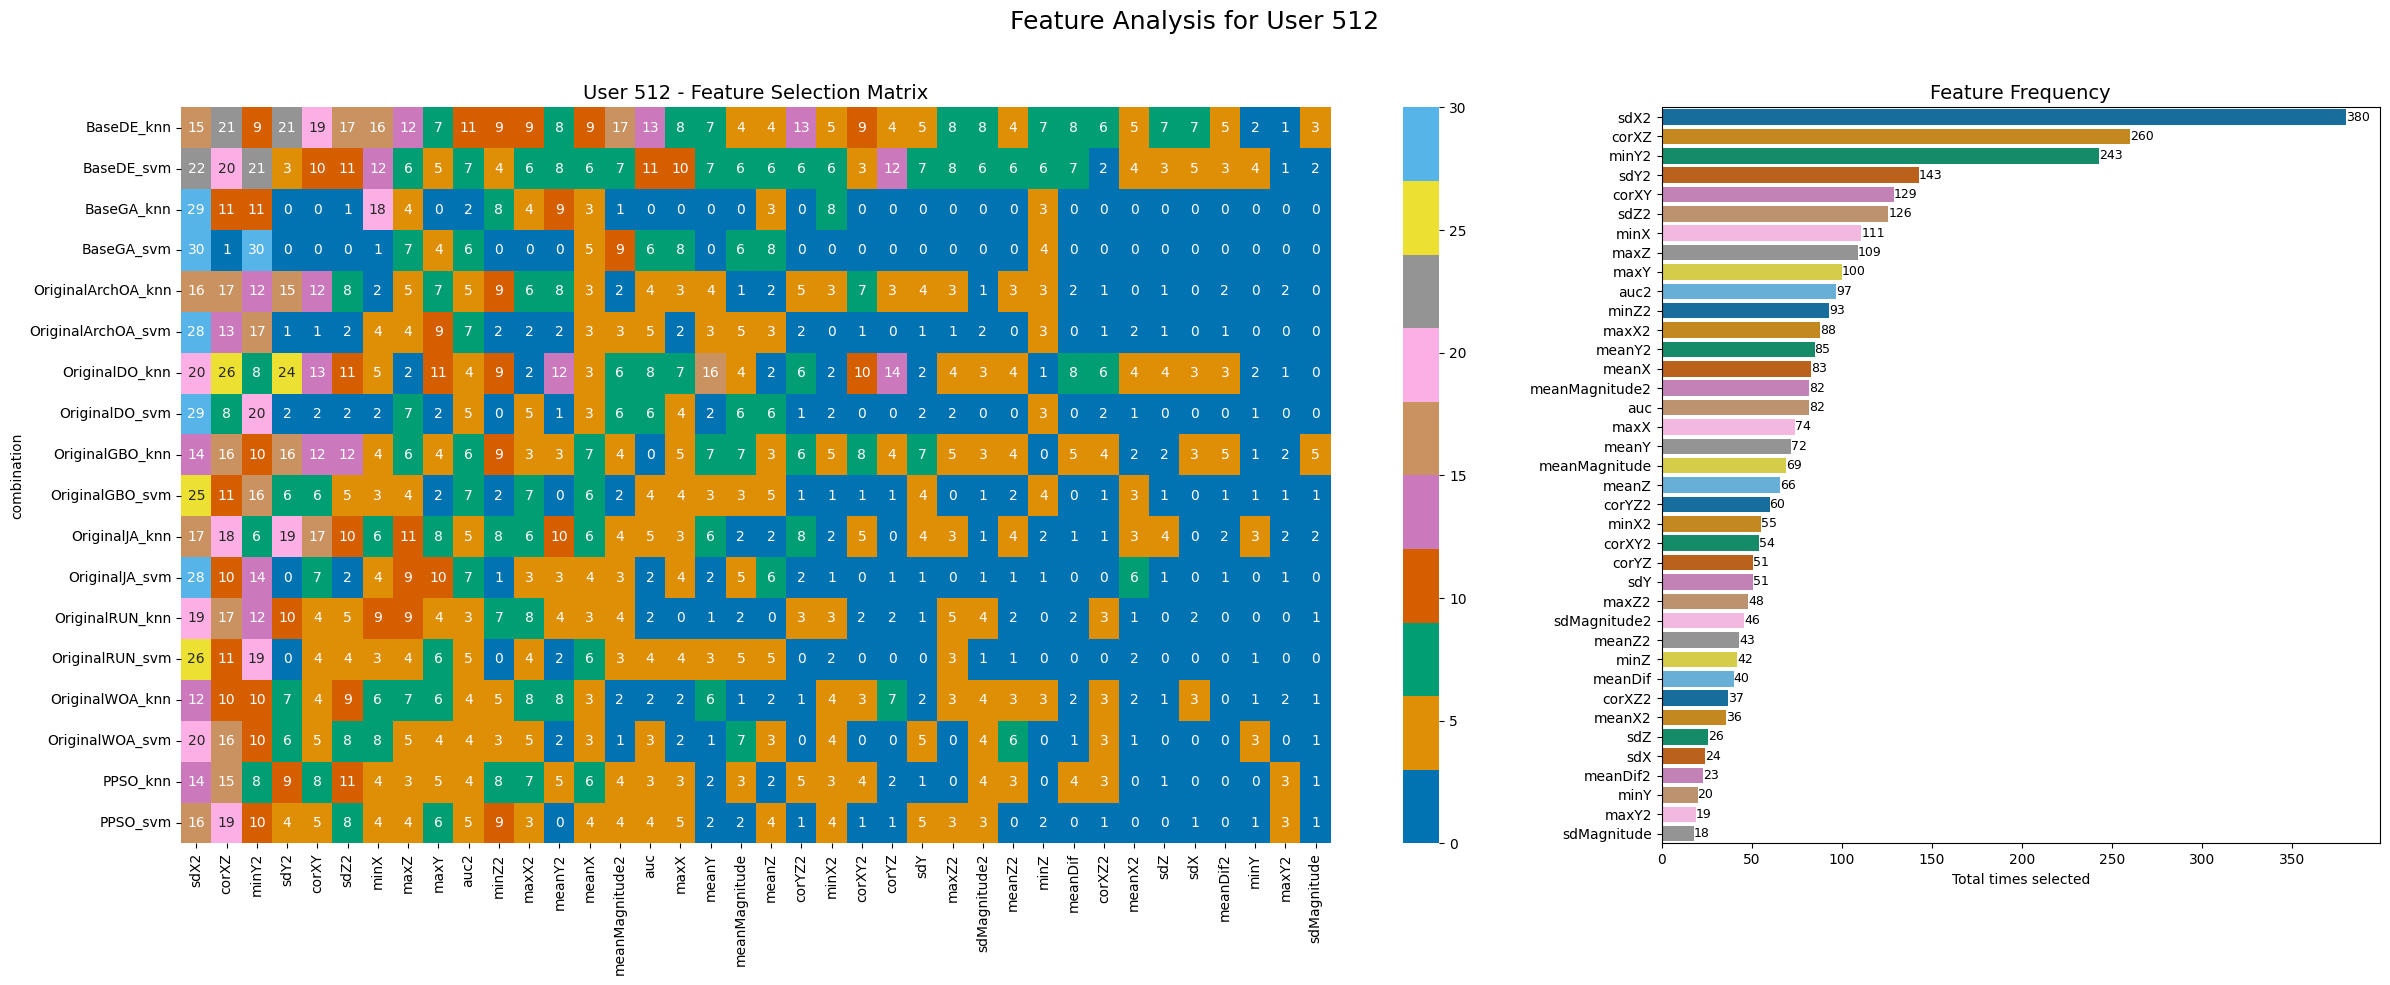

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_1080\2404769947.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_sums.values, y=feature_sums.index, orient="h", palette="colorblind", ax=axes[1])


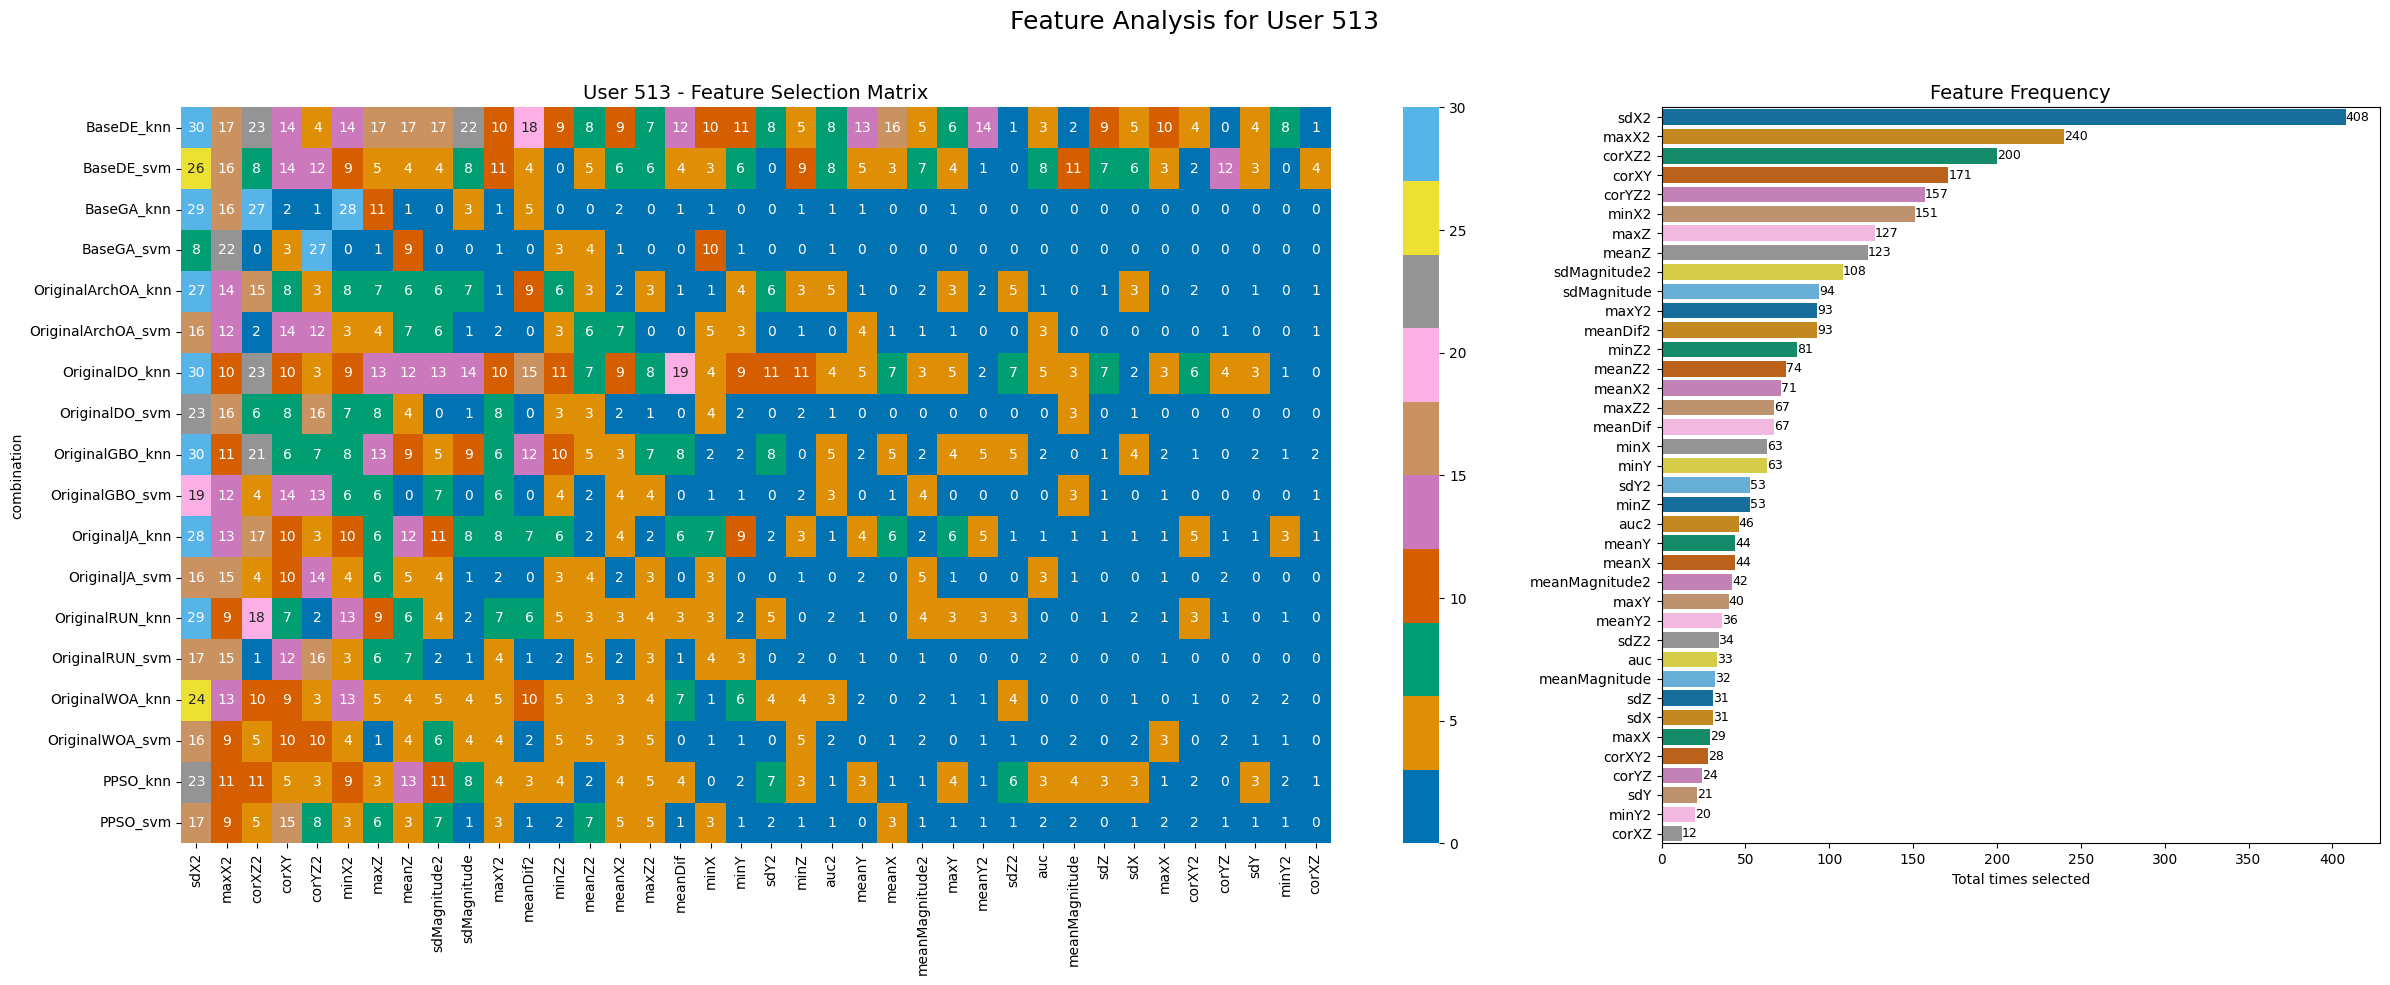

C:\Users\Coord-Personal\AppData\Local\Temp\ipykernel_1080\2404769947.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_sums.values, y=feature_sums.index, orient="h", palette="colorblind", ax=axes[1])


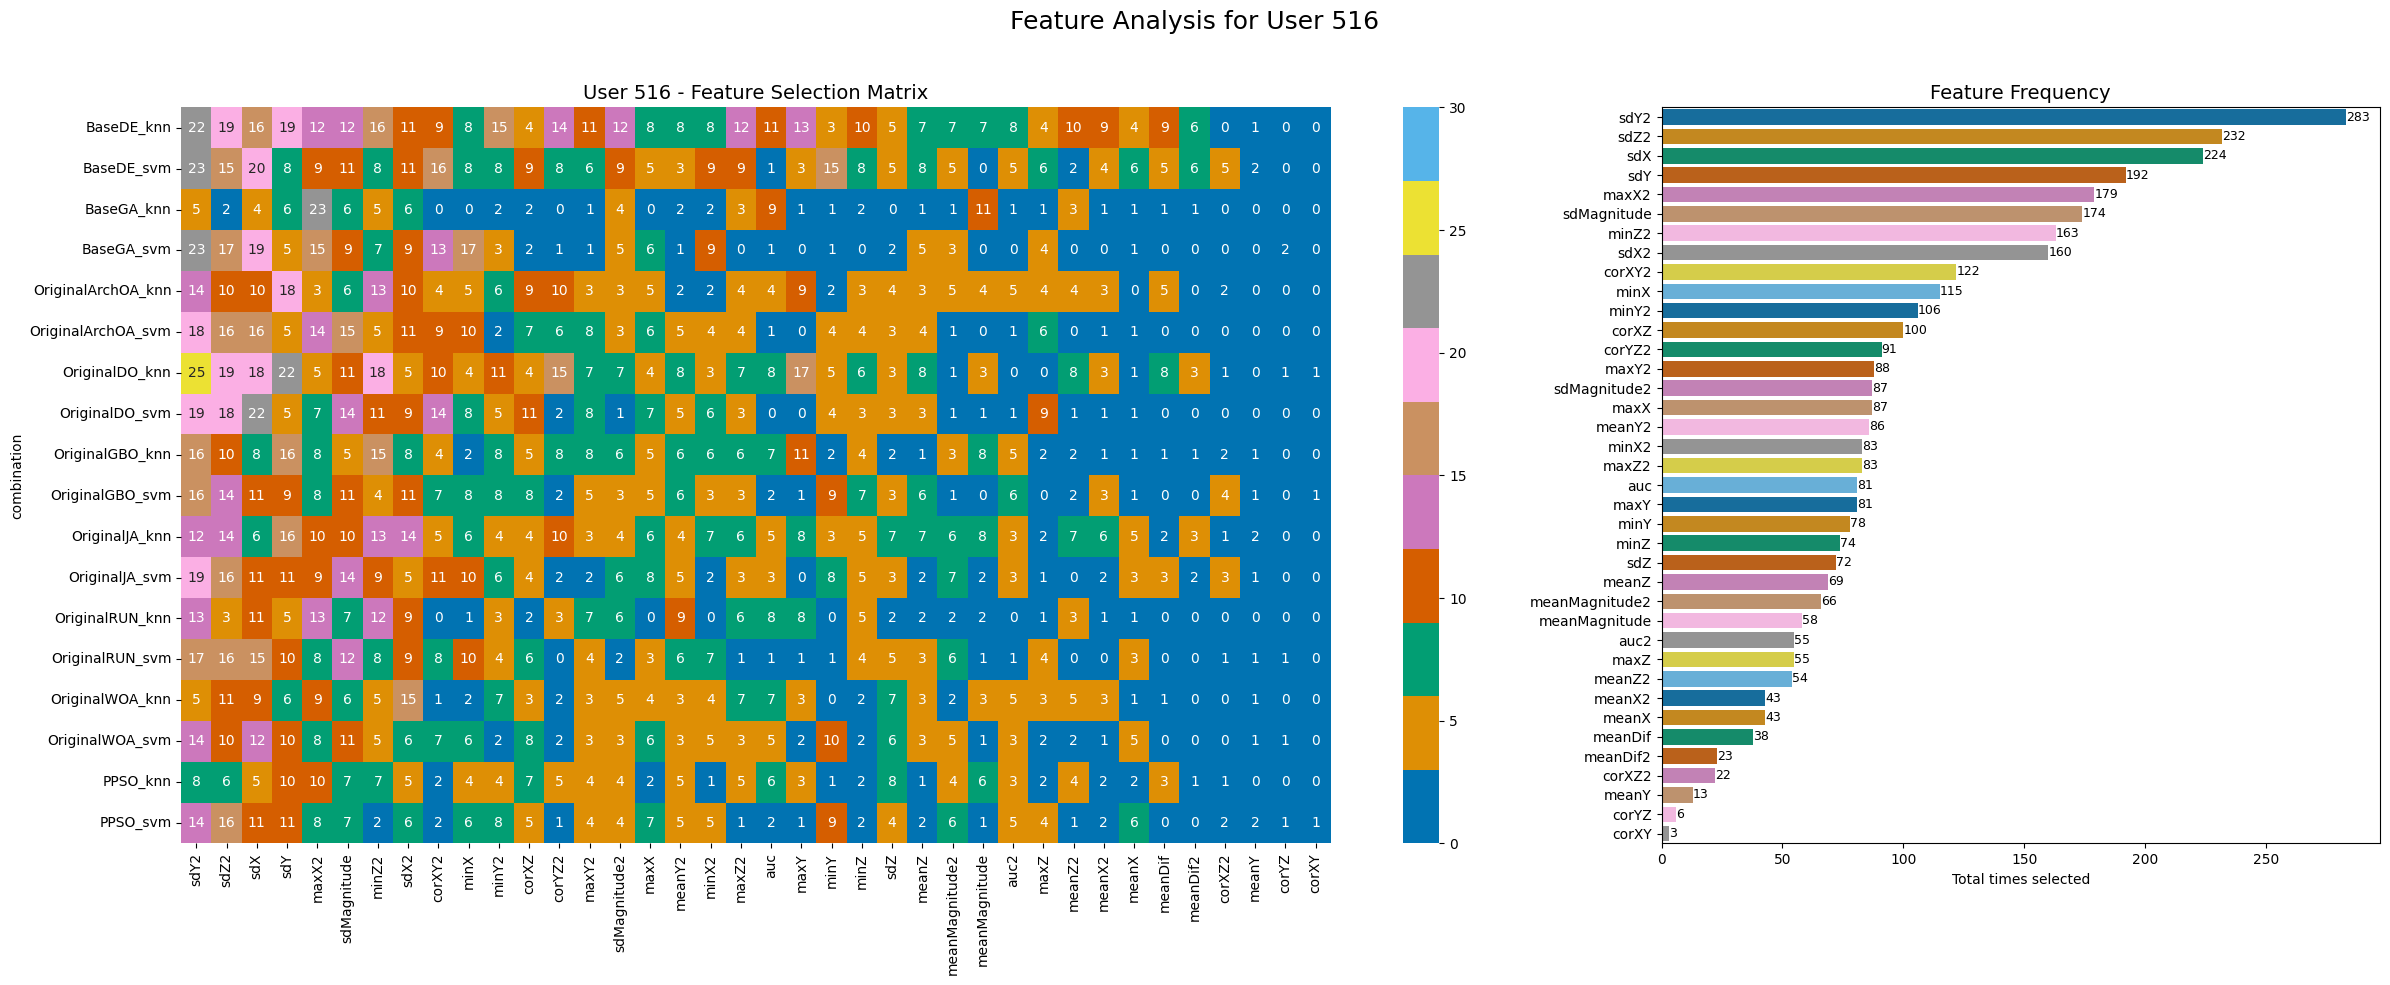

In [ ]:
for u in feature_counts["user"].unique():
    # filter the rows for each user and drop the "user" column
    user_data = feature_counts[feature_counts["user"] == u].drop(columns="user")

    # we have to convert the data to float to plot it
    user_data = user_data.astype(float)

    # Ordenar features por total seleccionado
    ordered_features = user_data.sum().sort_values(ascending=False).index
    user_data = user_data[ordered_features]

    # Sumar totales de cada feature
    feature_sums = user_data.sum()

    # Crear figura con 2 subplots: heatmap y barplot
    fig, axes = plt.subplots(1, 2, figsize=(24, 10), gridspec_kw={'width_ratios': [2, 1]})

    # Heatmap
    sns.heatmap(user_data, vmin=0, vmax=30, cmap= sns.color_palette("colorblind", as_cmap = True), annot=True, ax=axes[0])
    axes[0].set_title(f"User {int(u)} - Feature Selection Matrix", fontsize=14)

    # Barplot
    sns.barplot(x=feature_sums.values, y=feature_sums.index, orient="h", palette="colorblind", ax=axes[1])
    axes[1].set_title("Feature Frequency", fontsize=14)
    axes[1].set_xlabel("Total times selected")
    axes[1].set_ylabel("")

    # Etiquetas encima de las barras
    for container in axes[1].containers:
        axes[1].bar_label(container, fontsize=9, fmt="%.0f")

    plt.suptitle(f"Feature Analysis for User {int(u)}", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # deja espacio al título general

    plt.savefig(fr"C:\Users\Coord-Personal\Documents\ITZELT\data_sciece_girlypop\proyecto_salvador\imagenes\feature_analysis_user_{int(u)}.svg")
    
    # Mostrar
    plt.show()

## Cluster Analysis for users and their features 

In [3]:
data = pd.read_csv(r"C:\Users\Coord-Personal\Documents\ITZELT\data_sciece_girlypop\proyecto_salvador\datos\df_matrix_features_counts.csv")

In [4]:
data 

,combination,meanY,corXY,corXY2,meanMagnitude2,maxY2,corXZ2,maxZ2,sdZ,meanY2,...,sdX2,sdMagnitude,corYZ,maxX,auc,sdY,minY,minX,meanDif2,user
0,BaseDE_knn,1,19,5,8,23,30,7,6,9,...,2,5,5,3,10,10,4,11,12,501.0
1,BaseDE_svm,16,11,2,7,19,30,6,7,19,...,0,8,7,6,8,6,9,11,5,501.0
2,BaseGA_knn,0,1,0,1,27,27,8,0,3,...,0,0,0,0,2,3,0,2,0,501.0
3,BaseGA_svm,2,0,0,1,30,30,0,0,8,...,1,7,0,6,2,5,3,6,0,501.0
4,OriginalArchOA_knn,1,21,1,1,19,27,4,1,6,...,0,0,0,5,4,2,0,6,1,501.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,OriginalRUN_svm,1,0,8,6,4,1,1,5,6,...,9,12,1,3,1,10,1,10,0,516.0
212,OriginalWOA_knn,1,0,1,2,3,0,7,7,3,...,15,6,0,4,7,6,0,2,0,516.0
213,OriginalWOA_svm,1,0,7,5,3,0,3,6,3,...,6,11,1,6,5,10,10,6,0,516.0
214,PPSO_knn,0,0,2,4,4,1,5,8,5,...,5,7,0,2,6,10,1,4,1,516.0


In [ ]:
fts = data.drop(columns = ['combination', 'user'])

# we define a vector by user which summarizes how each user selects features on average
user_profiles = data.groupby('user')[fts.columns].mean()

In [6]:
user_profiles

,meanY,corXY,corXY2,meanMagnitude2,maxY2,corXZ2,maxZ2,sdZ,meanY2,meanMagnitude,...,meanZ2,sdX2,sdMagnitude,corYZ,maxX,auc,sdY,minY,minX,meanDif2
user,,,,,,,,,,,,,,,,,,,,,
501.0,5.111111,10.166667,1.722222,2.722222,19.500000,28.944444,3.444444,1.611111,5.333333,5.055556,...,1.722222,0.611111,2.111111,2.444444,4.222222,4.444444,4.722222,2.388889,4.777778,1.444444
502.0,8.666667,2.333333,1.555556,1.333333,3.222222,5.611111,3.444444,4.111111,2.944444,10.833333,...,9.833333,1.388889,1.500000,3.388889,4.222222,10.333333,1.000000,4.833333,3.555556,8.666667
504.0,4.444444,1.888889,4.277778,4.277778,16.555556,7.888889,7.333333,1.000000,1.444444,2.333333,...,4.777778,12.277778,15.611111,1.388889,1.888889,2.444444,5.555556,3.222222,4.388889,2.722222
505.0,4.722222,0.833333,0.222222,1.722222,0.500000,0.222222,1.166667,1.611111,0.888889,1.500000,...,0.833333,3.055556,1.055556,0.555556,2.833333,2.277778,0.166667,1.055556,2.166667,0.277778
507.0,1.111111,1.666667,0.666667,2.444444,2.166667,0.388889,3.055556,0.166667,2.833333,3.000000,...,7.277778,6.166667,3.833333,2.722222,0.722222,2.000000,0.666667,2.777778,4.722222,1.055556
508.0,3.722222,0.222222,1.222222,2.944444,10.666667,14.722222,2.833333,0.388889,3.166667,2.666667,...,3.000000,7.444444,1.388889,4.833333,7.944444,2.444444,12.444444,3.833333,4.888889,2.055556
509.0,21.000000,0.722222,8.444444,3.500000,2.888889,14.555556,1.555556,1.833333,1.777778,2.333333,...,1.611111,5.055556,1.944444,0.833333,3.500000,2.500000,5.055556,14.222222,2.166667,0.888889
510.0,2.777778,7.055556,13.777778,3.833333,4.111111,8.833333,2.666667,4.555556,5.666667,2.944444,...,5.833333,2.611111,5.666667,4.777778,2.444444,2.777778,22.500000,4.111111,4.333333,2.666667
511.0,2.166667,2.166667,4.611111,3.166667,5.444444,0.666667,4.388889,4.722222,3.111111,3.777778,...,5.388889,7.888889,25.277778,7.722222,2.333333,3.833333,10.055556,10.666667,9.166667,1.888889


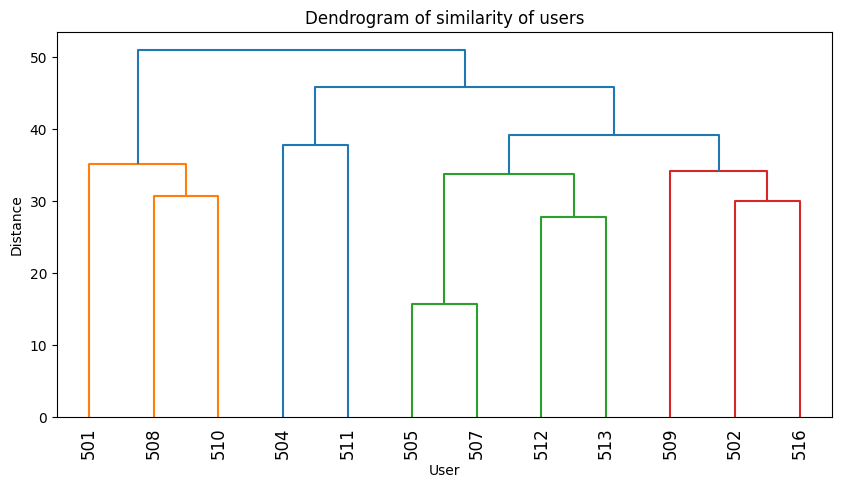

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(user_profiles, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, labels=user_profiles.index.astype(int), leaf_rotation=90)
plt.title("Dendrogram of similarity of users")
plt.xlabel("User")
plt.ylabel("Distance")
plt.savefig(r"C:\Users\Coord-Personal\Documents\ITZELT\data_sciece_girlypop\proyecto_salvador\imagenes\dendrogram_users.svg")
plt.show()

para determinar el número óptimo de clusters, lo rotamos 270° clockwise y partimos una linea vertical, el que tenga la distancia máxima entre lineas horizontales, y el numero optimo es la cantidad de lineas que parta, en este caso, es 2

In [8]:
experiment_c = [2, 3, 4]               
all_clusters = []

for k in experiment_c:
    clustering = AgglomerativeClustering(n_clusters=k)
    labels = clustering.fit_predict(user_profiles)

    df_labels = pd.DataFrame({
        'user': user_profiles.index,
        'experiment': k,
        'cluster': labels
    })

    df_merged = user_profiles.reset_index().merge(df_labels, on='user')
    all_clusters.append(df_merged)

clusters_experiments = pd.concat(all_clusters, ignore_index=True)

In [9]:
clusters_experiments

,user,meanY,corXY,corXY2,meanMagnitude2,maxY2,corXZ2,maxZ2,sdZ,meanY2,...,sdMagnitude,corYZ,maxX,auc,sdY,minY,minX,meanDif2,experiment,cluster
0,501.0,5.111111,10.166667,1.722222,2.722222,19.500000,28.944444,3.444444,1.611111,5.333333,...,2.111111,2.444444,4.222222,4.444444,4.722222,2.388889,4.777778,1.444444,2,1
1,502.0,8.666667,2.333333,1.555556,1.333333,3.222222,5.611111,3.444444,4.111111,2.944444,...,1.500000,3.388889,4.222222,10.333333,1.000000,4.833333,3.555556,8.666667,2,0
2,504.0,4.444444,1.888889,4.277778,4.277778,16.555556,7.888889,7.333333,1.000000,1.444444,...,15.611111,1.388889,1.888889,2.444444,5.555556,3.222222,4.388889,2.722222,2,0
3,505.0,4.722222,0.833333,0.222222,1.722222,0.500000,0.222222,1.166667,1.611111,0.888889,...,1.055556,0.555556,2.833333,2.277778,0.166667,1.055556,2.166667,0.277778,2,0
4,507.0,1.111111,1.666667,0.666667,2.444444,2.166667,0.388889,3.055556,0.166667,2.833333,...,3.833333,2.722222,0.722222,2.000000,0.666667,2.777778,4.722222,1.055556,2,0
5,508.0,3.722222,0.222222,1.222222,2.944444,10.666667,14.722222,2.833333,0.388889,3.166667,...,1.388889,4.833333,7.944444,2.444444,12.444444,3.833333,4.888889,2.055556,2,1
6,509.0,21.000000,0.722222,8.444444,3.500000,2.888889,14.555556,1.555556,1.833333,1.777778,...,1.944444,0.833333,3.500000,2.500000,5.055556,14.222222,2.166667,0.888889,2,0
7,510.0,2.777778,7.055556,13.777778,3.833333,4.111111,8.833333,2.666667,4.555556,5.666667,...,5.666667,4.777778,2.444444,2.777778,22.500000,4.111111,4.333333,2.666667,2,1
8,511.0,2.166667,2.166667,4.611111,3.166667,5.444444,0.666667,4.388889,4.722222,3.111111,...,25.277778,7.722222,2.333333,3.833333,10.055556,10.666667,9.166667,1.888889,2,0
9,512.0,4.000000,7.166667,3.000000,4.555556,1.055556,2.055556,2.666667,1.444444,4.722222,...,1.000000,2.833333,4.111111,4.555556,2.833333,1.111111,6.166667,1.277778,2,0


In [17]:
clusters_experiments.groupby(["experiment", "cluster"])["user"].apply(list).reset_index()

,experiment,cluster,user
0,2,0,"[502.0, 504.0, 505.0, 507.0, 509.0, 511.0, 512..."
1,2,1,"[501.0, 508.0, 510.0]"
2,3,0,"[502.0, 505.0, 507.0, 509.0, 512.0, 513.0, 516.0]"
3,3,1,"[501.0, 508.0, 510.0]"
4,3,2,"[504.0, 511.0]"
5,4,0,"[504.0, 511.0]"
6,4,1,"[501.0, 508.0, 510.0]"
7,4,2,"[502.0, 509.0, 516.0]"
8,4,3,"[505.0, 507.0, 512.0, 513.0]"


In [20]:
results_metrics_clusters = []

for k in experiment_c:
    exp = clusters_experiments[clusters_experiments['experiment'] == k].copy()
    X = exp.drop(columns=['user', 'cluster', 'experiment']).values
    labels = exp['cluster'].values
    
    sil = silhouette_score(X, labels) #  The silhouette coefficient ranges from -1 to 1, with values close to 1 indicating good clustering
    ch = calinski_harabasz_score(X, labels) # Good for comparing different k values: Higher values indicate better defined clusters
    db = davies_bouldin_score(X, labels) # Lower values indicate better clustering
        
    results_metrics_clusters.append({
        'experiment': k,
        'silhouette_score': sil, 
        'calinski_harabasz_score': ch,
        'davies_bouldin_score': db
    })

results_metrics_clusters_df = pd.DataFrame(results_metrics_clusters).sort_values(by='silhouette_score', ascending=False)

In [21]:
results_metrics_clusters_df

,experiment,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,2,0.118551,2.262031,1.725449
1,3,0.111691,2.257925,1.534991
2,4,0.084868,2.120999,1.513798


In [22]:
results_metrics_clusters_df.to_latex(index = False, float_format="%.3f", column_format="lccc",
                                      caption="Clustering metrics experiments")

'\\begin{table}\n\\caption{Clustering metrics experiments}\n\\begin{tabular}{lccc}\n\\toprule\nexperiment & silhouette_score & calinski_harabasz_score & davies_bouldin_score \\\\\n\\midrule\n2 & 0.119 & 2.262 & 1.725 \\\\\n3 & 0.112 & 2.258 & 1.535 \\\\\n4 & 0.085 & 2.121 & 1.514 \\\\\n\\bottomrule\n\\end{tabular}\n\\end{table}\n'